
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1    0.666106                4.126144          2167.779119   
2    0.675145                4.120736          2166.974740   
3    0.776831                4.120331          2166.384674   
4    0.794132                4.171589          2167.616317   
5    0.812430                4.201480          2165.928695   
..        ...                     ...                  ...   
880  0.557000                4.088250          2165.962951   
881  1.030851                4.184608          2158.704304   
882  0.735068                4.105357          2166.170892   
883  0.610443                4.081189          2164.578775   
884  0.625000                4.142208          2166.999631   

     NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1              9419.200115   185.828474                    0.0           0.0   
2              9564.165802   185.924481                    0.0           0.0   
3              9648.247637   185.942943                    0.0           0.0   
4              9800.277716   185.660164                    0.0           0.0   
5              9720.889670   185.986077                    0.0           0.0   
..                     ...          ...                    ...           ...   
880            8542.790031   185.777720                    0.0           0.0   
881            9137.477696   186.593469                    0.0           0.0   
882            7063.622341   166.631867                    0.0           0.0   
883            7951.673603   173.909487                    0.0           0.0   
884            8604.508731   180.473741                    0.0           0.0   

     Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1             0.360        0.10  44562.0     7.0  156.684211   
2             0.319        0.34  44562.0     8.0  150.869919   
3             0.335        0.28  44562.0     9.0  160.218182   
4             0.350        0.24  44562.0    10.0  168.487013   
5             0.334        0.20  44562.0    11.0  162.696078   
..              ...         ...      ...     ...         ...   
880           0.337        0.06  44560.0  4326.0  169.602837   
881           0.321        0.04  44560.0  4327.0  152.000000   
882           0.363        0.08  44560.0  4329.0  142.152941   
883           0.358        0.18  44560.0  4330.0  154.863636   
884           0.346        0.21  44560.0  4331.0  143.145038   

     Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1              20.749627             18.341701             4.137632   
2              20.609259             18.644476             4.142824   
3              20.617383             18.845791             4.220690   
4              20.761851             18.565015             4.307315   
5              20.999677             18.571620             4.389799   
..                   ...                   ...                  ...   
880            21.182140             18.345139             3.886791   
881            20.933434             18.518021             4.039700   
882            21.250872             18.296370             3.608121   
883            20.999686             18.132379             3.838758   
884            20.400904             18.543402             3.999111   

     Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1              55.375043    167.017421    195.812061    147.562523   
2              55.341884    154.214917    188.028883    147.807509   
3              55.284451    156.234542    200.141261    149.014319   
4              55.405926    154.325145    197.306648    149.145198   
5              55.136950    162.255752    204.143524    142.246698   
..                   ...           ...           ...           ...   
880            55.376367    167.379696    218.089656    153.364430   
881            55.324487    165.541407    209.736294    154.467246   
882            55.541718    171.382098    195.7887

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 1 to 884
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    884 non-null    float64
 1   HOST_BLAST_MOISTURE_f3   884 non-null    float64
 2   HOT_BLAST_TMP_NS_f3      884 non-null    float64
 3   NAT_GAS _INJECTION_f3    884 non-null    float64
 4   WINDRATE_f3              884 non-null    float64
 5   HIGH_PURITY_OXYGEN_f3    884 non-null    float64
 6   COAL_FLOW_f3             884 non-null    float64
 7   Cast_Avg_Mn_f2           884 non-null    float64
 8   Slag_Fe_f2               884 non-null    float64
 9   date_f1                  884 non-null    float64
 10  CNUM                     884 non-null    float64
 11  LNUM_f1                  884 non-null    float64
 12  Selec_Top_Gas_CO_f3      884 non-null    float64
 13  Selec_Top_Gas_CO2_f3     884 non-null    float64
 14  Selec_Top_Gas_H2_f3      8

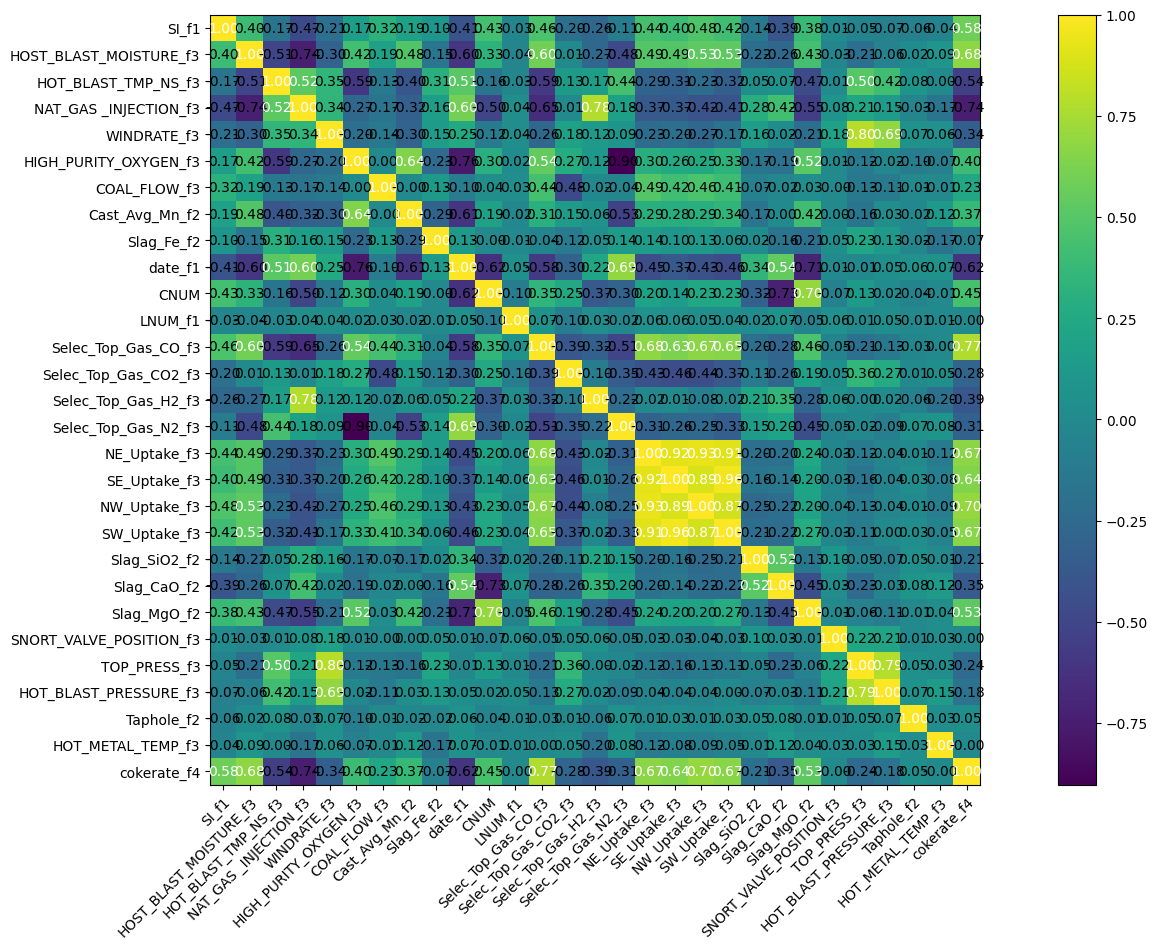

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1    0.666106  2022-01-01 10:17:00                4.126144   
2    0.675145  2022-01-01 12:40:00                4.120736   
3    0.776831  2022-01-01 15:06:00                4.120331   
4    0.794132  2022-01-01 16:30:00                4.171589   
5    0.812430  2022-01-01 19:40:00                4.201480   
..        ...                  ...                     ...   
880  0.557000  2021-12-30 05:18:00                4.088250   
881  1.030851  2021-12-30 07:15:00                4.184608   
882  0.735068  2021-12-30 09:18:00                4.105357   
883  0.610443  2021-12-30 12:15:00                4.081189   
884  0.625000  2021-12-30 14:20:00                4.142208   

     HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1            2167.779119            9419.200115   185.828474   
2            2166.974740            9564.165802   185.924481   
3            2166.384674            9648.247637   185.942943   
4            2167.616317            9800.277716   185.660164   
5            2165.928695            9720.889670   185.986077   
..                   ...                    ...          ...   
880          2165.962951            8542.790031   185.777720   
881          2158.704304            9137.477696   186.593469   
882          2166.170892            7063.622341   166.631867   
883          2164.578775            7951.673603   173.909487   
884          2166.999631            8604.508731   180.473741   

     HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1  \
1                      0.0           0.0           0.360        0.10  44562.0   
2                      0.0           0.0           0.319        0.34  44562.0   
3                      0.0           0.0           0.335        0.28  44562.0   
4                      0.0           0.0           0.350        0.24  44562.0   
5                      0.0           0.0           0.334        0.20  44562.0   
..                     ...           ...             ...         ...      ...   
880                    0.0           0.0           0.337        0.06  44560.0   
881                    0.0           0.0           0.321        0.04  44560.0   
882                    0.0           0.0           0.363        0.08  44560.0   
883                    0.0           0.0           0.358        0.18  44560.0   
884                    0.0           0.0           0.346        0.21  44560.0   

       CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1       7.0  156.684211            20.749627             18.341701   
2       8.0  150.869919            20.609259             18.644476   
3       9.0  160.218182            20.617383             18.845791   
4      10.0  168.487013            20.761851             18.565015   
5      11.0  162.696078            20.999677             18.571620   
..      ...         ...                  ...                   ...   
880  4326.0  169.602837            21.182140             18.345139   
881  4327.0  152.000000            20.933434             18.518021   
882  4329.0  142.152941            21.250872             18.296370   
883  4330.0  154.863636            20.999686             18.132379   
884  4331.0  143.145038            20.400904             18.543402   

     Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1               4.137632            55.375043    167.017421    195.812061   
2               4.142824            55.341884    154.214917    188.028883   
3               4.220690            55.284451    156.234542    200.141261   
4               4.307315            55.405926    154.325145    197.306648   
5               4.389799            55.136950    162.255752    204.143524   
..                   ...                  ...           ...           ...   
880             3.886791            55.376367    167.379696    218.089656   
881             4.039700            55.324487    165.541407    2


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0    0.000000    0.000000  0.666106  2022-01-01 10:17:00   
1    0.000000    0.000000  0.675145  2022-01-01 12:40:00   
2    0.101686    0.000000  0.776831  2022-01-01 15:06:00   
3    0.017301    0.000000  0.794132  2022-01-01 16:30:00   
4    0.018297    0.000000  0.812430  2022-01-01 19:40:00   
..        ...         ...       ...                  ...   
879 -0.161057   -0.033235  0.557000  2021-12-30 05:18:00   
880  0.473851   -0.017596  1.030851  2021-12-30 07:15:00   
881 -0.295783   -0.014447  0.735068  2021-12-30 09:18:00   
882 -0.124625   -0.014861  0.610443  2021-12-30 12:15:00   
883  0.014557   -0.014537  0.625000  2021-12-30 14:20:00   

     HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                  4.126144          2167.779119            9419.200115   
1                  4.120736          2166.974740            9564.165802   
2                  4.120331          2166.384674            9648.247637   
3                  4.171589          2167.616317            9800.277716   
4                  4.201480          2165.928695            9720.889670   
..                      ...                  ...                    ...   
879                4.088250          2165.962951            8542.790031   
880                4.184608          2158.704304            9137.477696   
881                4.105357          2166.170892            7063.622341   
882                4.081189          2164.578775            7951.673603   
883                4.142208          2166.999631            8604.508731   

     WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0     185.828474                    0.0    0   17    10    1      1  2022   
1     185.924481                    0.0    0   40    12    1      1  2022   
2     185.942943                    0.0    0    6    15    1      1  2022   
3     185.660164                    0.0    0   30    16    1      1  2022   
4     185.986077                    0.0    0   40    19    1      1  2022   
..           ...                    ...  ...  ...   ...  ...    ...   ...   
879   185.777720                    0.0    0   18     5   30     12  2021   
880   186.593469                    0.0    0   15     7   30     12  2021   
881   166.631867                    0.0    0   18     9   30     12  2021   
882   173.909487                    0.0    0   15    12   30     12  2021   
883   180.473741                    0.0    0   20    14   30     12  2021   

     COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0             0.0           0.360        0.10     7.0            20.749627   
1             0.0           0.319        0.34     8.0            20.609259   
2             0.0           0.335        0.28     9.0            20.617383   
3             0.0           0.350        0.24    10.0            20.761851   
4             0.0           0.334        0.20    11.0            20.999677   
..            ...             ...         ...     ...                  ...   
879           0.0           0.337        0.06  4326.0            21.182140   
880           0.0           0.321        0.04  4327.0            20.933434   
881           0.0           0.363        0.08  4329.0            21.250872   
882           0.0           0.358        0.18  4330.0            20.999686   
883           0.0           0.346        0.21  4331.0            20.400904   

     Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0               18.341701             4.137632            55.375043   
1               18.644476             4.142824            55.341884   
2               18.845791             4.220690            55.284451   
3               18.565015             4.307315            55.405926   
4               18.571620             4.389799            55.136950   
..                    ...                  ...                  ...   
879             18.34513

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0    0.000000    0.000000  0.666106  2022-01-01 10:17:00   
1    0.000000    0.000000  0.675145  2022-01-01 12:40:00   
2    0.101686    0.000000  0.776831  2022-01-01 15:06:00   
3    0.017301    0.000000  0.794132  2022-01-01 16:30:00   
4    0.018297    0.000000  0.812430  2022-01-01 19:40:00   
..        ...         ...       ...                  ...   
879 -0.161057   -0.033235  0.557000  2021-12-30 05:18:00   
880  0.473851   -0.017596  1.030851  2021-12-30 07:15:00   
881 -0.295783   -0.014447  0.735068  2021-12-30 09:18:00   
882 -0.124625   -0.014861  0.610443  2021-12-30 12:15:00   
883  0.014557   -0.014537  0.625000  2021-12-30 14:20:00   

     HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                  4.126144          2167.779119            9419.200115   
1                  4.120736          2166.974740            9564.165802   
2                  4.120331          2166.384674            9648.247637   
3                  4.171589          2167.616317            9800.277716   
4                  4.201480          2165.928695            9720.889670   
..                      ...                  ...                    ...   
879                4.088250          2165.962951            8542.790031   
880                4.184608          2158.704304            9137.477696   
881                4.105357          2166.170892            7063.622341   
882                4.081189          2164.578775            7951.673603   
883                4.142208          2166.999631            8604.508731   

     WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0     185.828474                    0.0    0   17    10    1      1  2022   
1     185.924481                    0.0    0   40    12    1      1  2022   
2     185.942943                    0.0    0    6    15    1      1  2022   
3     185.660164                    0.0    0   30    16    1      1  2022   
4     185.986077                    0.0    0   40    19    1      1  2022   
..           ...                    ...  ...  ...   ...  ...    ...   ...   
879   185.777720                    0.0    0   18     5   30     12  2021   
880   186.593469                    0.0    0   15     7   30     12  2021   
881   166.631867                    0.0    0   18     9   30     12  2021   
882   173.909487                    0.0    0   15    12   30     12  2021   
883   180.473741                    0.0    0   20    14   30     12  2021   

     COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0             0.0           0.360        0.10     7.0            20.749627   
1             0.0           0.319        0.34     8.0            20.609259   
2             0.0           0.335        0.28     9.0            20.617383   
3             0.0           0.350        0.24    10.0            20.761851   
4             0.0           0.334        0.20    11.0            20.999677   
..            ...             ...         ...     ...                  ...   
879           0.0           0.337        0.06  4326.0            21.182140   
880           0.0           0.321        0.04  4327.0            20.933434   
881           0.0           0.363        0.08  4329.0            21.250872   
882           0.0           0.358        0.18  4330.0            20.999686   
883           0.0           0.346        0.21  4331.0            20.400904   

     Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0               18.341701             4.137632            55.375043   
1               18.644476             4.142824            55.341884   
2               18.845791             4.220690            55.284451   
3               18.565015             4.307315            55.405926   
4               18.571620             4.389799            55.136950   
..                    ...                  ...                  ...   
879             18.34513

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0    0.000000    0.000000  0.666106                4.126144   
1    0.000000    0.000000  0.675145                4.120736   
2    0.101686    0.000000  0.776831                4.120331   
3    0.017301    0.000000  0.794132                4.171589   
4    0.018297    0.000000  0.812430                4.201480   
..        ...         ...       ...                     ...   
879 -0.161057   -0.033235  0.557000                4.088250   
880  0.473851   -0.017596  1.030851                4.184608   
881 -0.295783   -0.014447  0.735068                4.105357   
882 -0.124625   -0.014861  0.610443                4.081189   
883  0.014557   -0.014537  0.625000                4.142208   

     HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0            2167.779119            9419.200115   185.828474   
1            2166.974740            9564.165802   185.924481   
2            2166.384674            9648.247637   185.942943   
3            2167.616317            9800.277716   185.660164   
4            2165.928695            9720.889670   185.986077   
..                   ...                    ...          ...   
879          2165.962951            8542.790031   185.777720   
880          2158.704304            9137.477696   186.593469   
881          2166.170892            7063.622341   166.631867   
882          2164.578775            7951.673603   173.909487   
883          2166.999631            8604.508731   180.473741   

     HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                      0.0    0   17    10    1      1  2022           0.0   
1                      0.0    0   40    12    1      1  2022           0.0   
2                      0.0    0    6    15    1      1  2022           0.0   
3                      0.0    0   30    16    1      1  2022           0.0   
4                      0.0    0   40    19    1      1  2022           0.0   
..                     ...  ...  ...   ...  ...    ...   ...           ...   
879                    0.0    0   18     5   30     12  2021           0.0   
880                    0.0    0   15     7   30     12  2021           0.0   
881                    0.0    0   18     9   30     12  2021           0.0   
882                    0.0    0   15    12   30     12  2021           0.0   
883                    0.0    0   20    14   30     12  2021           0.0   

     Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0             0.360        0.10     7.0            20.749627   
1             0.319        0.34     8.0            20.609259   
2             0.335        0.28     9.0            20.617383   
3             0.350        0.24    10.0            20.761851   
4             0.334        0.20    11.0            20.999677   
..              ...         ...     ...                  ...   
879           0.337        0.06  4326.0            21.182140   
880           0.321        0.04  4327.0            20.933434   
881           0.363        0.08  4329.0            21.250872   
882           0.358        0.18  4330.0            20.999686   
883           0.346        0.21  4331.0            20.400904   

     Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0               18.341701             4.137632            55.375043   
1               18.644476             4.142824            55.341884   
2               18.845791             4.220690            55.284451   
3               18.565015             4.307315            55.405926   
4               18.571620             4.389799            55.136950   
..                    ...                  ...                  ...   
879             18.345139             3.886791            55.376367   
880             18.518021             4.039700            55.324487   
881             18.296370             3.608121            55.541718   
882             18.132379             3.838758            55.60


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 884 non-null    float64
 1   mov_avg_SI               884 non-null    float64
 2   SI_f1                    884 non-null    float64
 3   HOST_BLAST_MOISTURE_f3   884 non-null    float64
 4   HOT_BLAST_TMP_NS_f3      884 non-null    float64
 5   NAT_GAS _INJECTION_f3    884 non-null    float64
 6   WINDRATE_f3              884 non-null    float64
 7   HIGH_PURITY_OXYGEN_f3    884 non-null    float64
 8   sec                      884 non-null    int64  
 9   min                      884 non-null    int64  
 10  hour                     884 non-null    int64  
 11  day                      884 non-null    int64  
 12  month                    884 non-null    int64  
 13  year                     884 non-null    int64  
 14  COAL_FLOW_f3             8

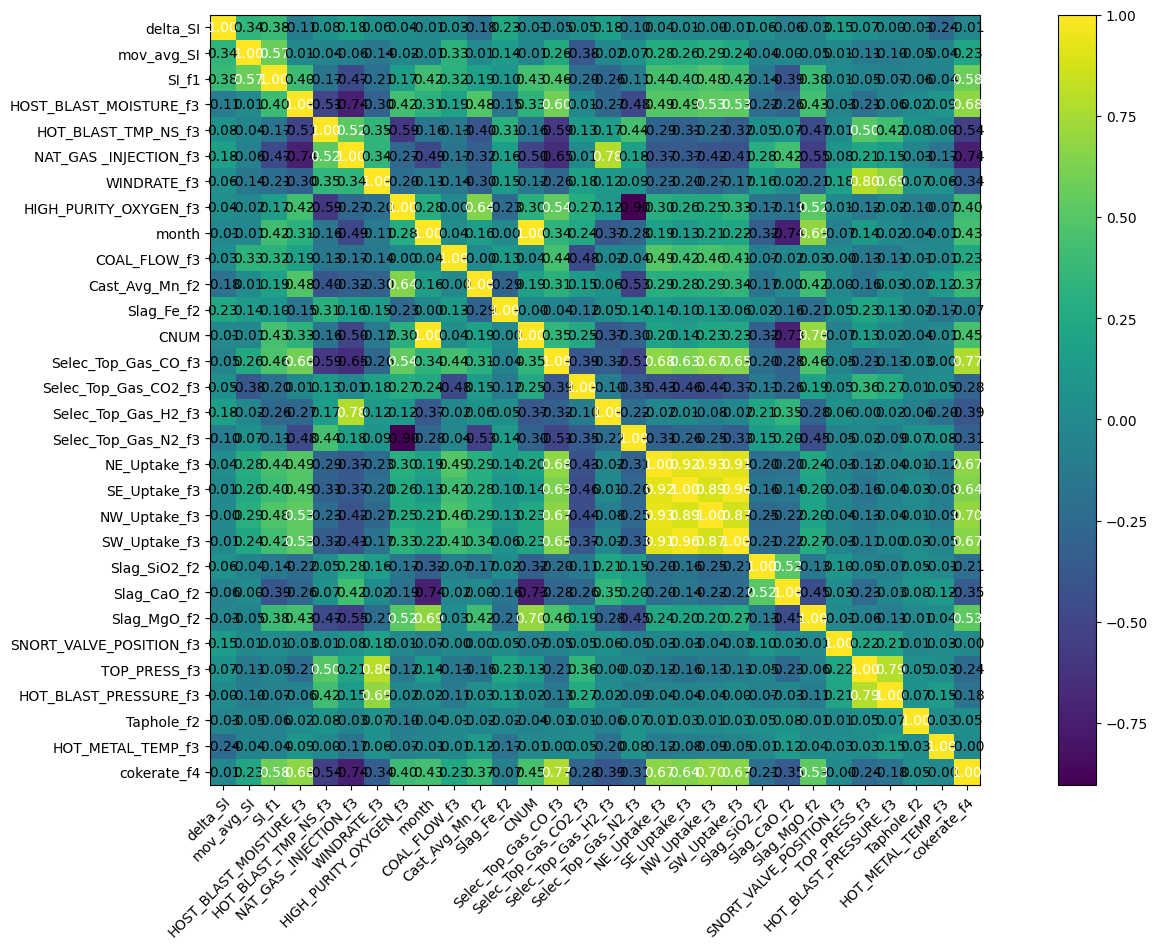

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


884



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 9.0
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        main_loss       = criterion(idx_pred[:, 8:], yb[:, 8:])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.344623
Loss_SI: 1.818800926208496 Loss_all: 1.419517993927002
===


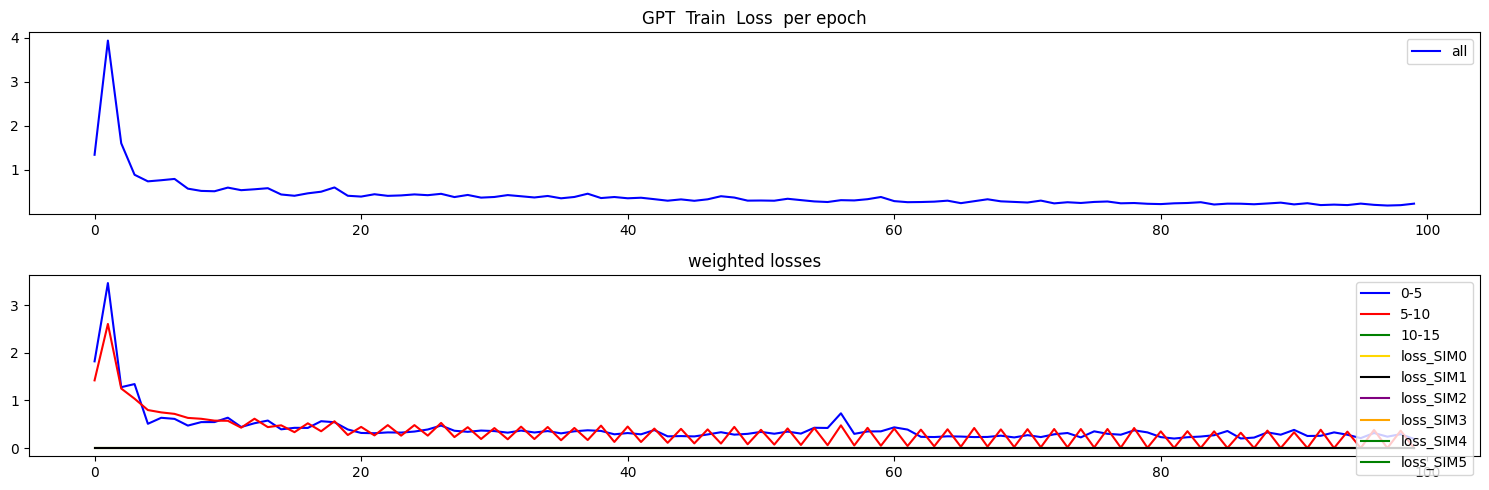

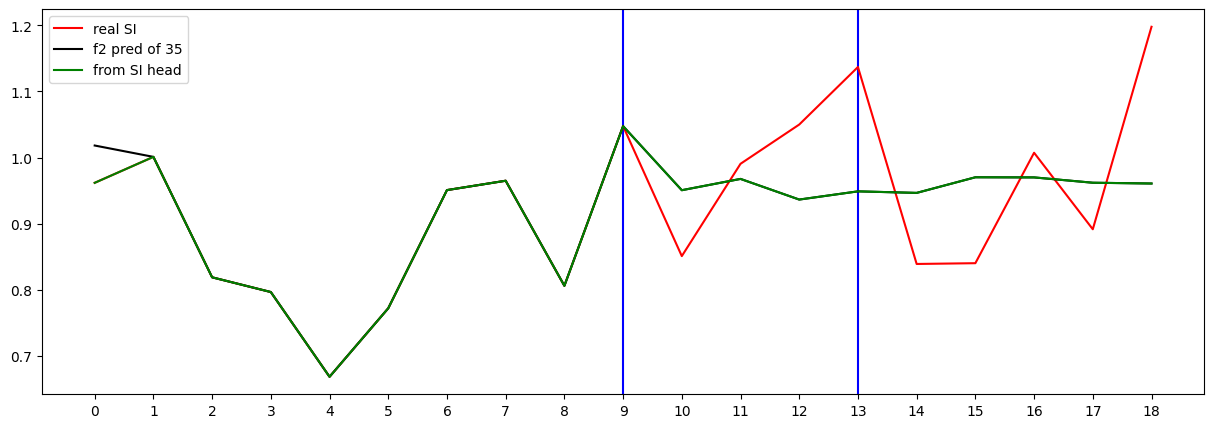

Testing R**2 - (all) - (no inputs):  0.9995364959513985
Testing R**2 - (f2) - SI full (no inputs):  -0.08608490397791835
Testing R**2 - SI head only (no inputs):  -0.08608490397791835
0 ...index R**2 (no inputs):  -0.1697594923365915
1 ...index R**2 (no inputs):  -1.3770338549521486
2 ...index R**2 (no inputs):  -0.08608490397791835
3 ...index R**2 (no inputs):  -64.5885708085844
4 ...index R**2 (no inputs):  -12.837271542196522
5 ...index R**2 (no inputs):  -1.1821651430307183
6 ...index R**2 (no inputs):  -7.67319282805259
7 ...index R**2 (no inputs):  -956.2338100558775
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.17045498565351425
10 ...index R**2 (no inputs):  -0.20722349830107634
11 ...index R**2 (no inputs):  -2.9963133936275814
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.21130529683034927
16 ...index R**2 (no inputs):  -0.4656928940491223
17 ...index R**2 (no inp

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.270888
Loss_SI: 1.0914453268051147 Loss_all: 1.1527248620986938
===


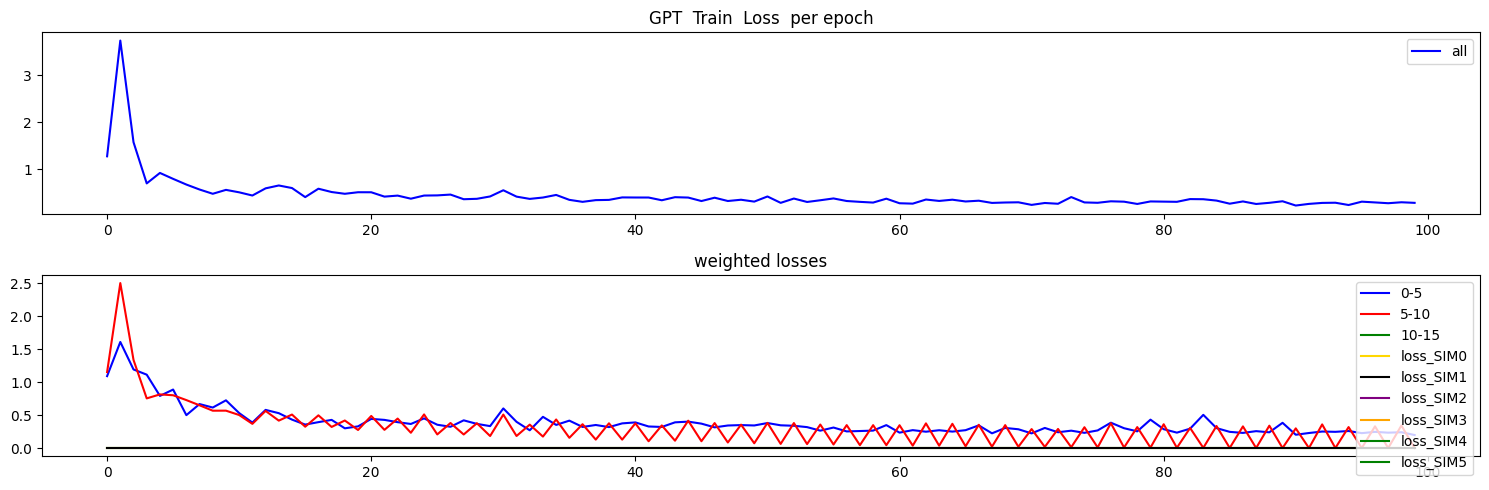

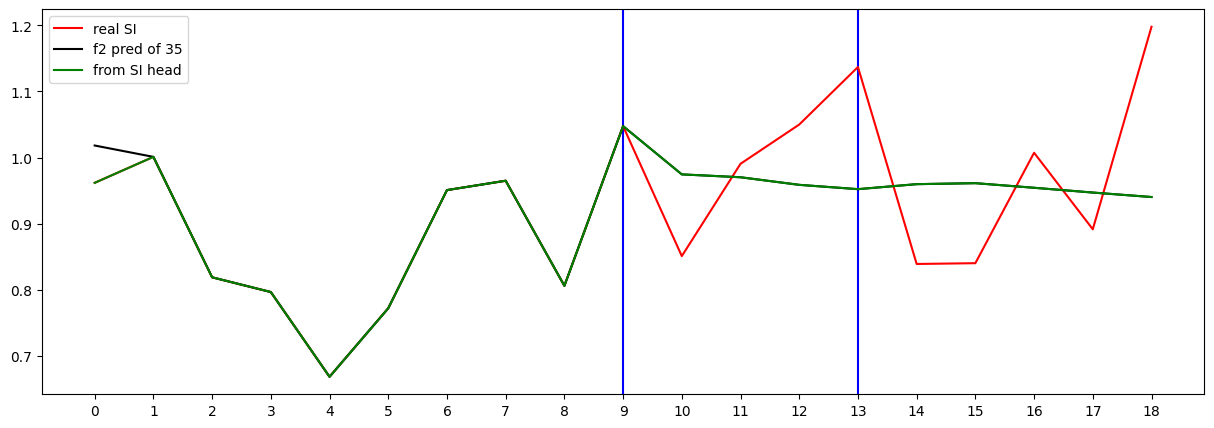

Testing R**2 - (all) - (no inputs):  0.9935122885803238
Testing R**2 - (f2) - SI full (no inputs):  -0.08426431790191158
Testing R**2 - SI head only (no inputs):  -0.08426431790191158
0 ...index R**2 (no inputs):  -0.12860660765620002
1 ...index R**2 (no inputs):  -1.0940928702646535
2 ...index R**2 (no inputs):  -0.08426431790191158
3 ...index R**2 (no inputs):  -41.77185401561001
4 ...index R**2 (no inputs):  -67.21968818499847
5 ...index R**2 (no inputs):  -29.400372437323917
6 ...index R**2 (no inputs):  -10.457093960535811
7 ...index R**2 (no inputs):  -84.25073914521641
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.016311052226084644
10 ...index R**2 (no inputs):  -0.2809057455390582
11 ...index R**2 (no inputs):  -0.61663748686419
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.007374558142252852
16 ...index R**2 (no inputs):  -1.0490098123648077
17 ...index R**2 (no in

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.578561
Loss_SI: 1.309355616569519 Loss_all: 1.4271689653396606
===


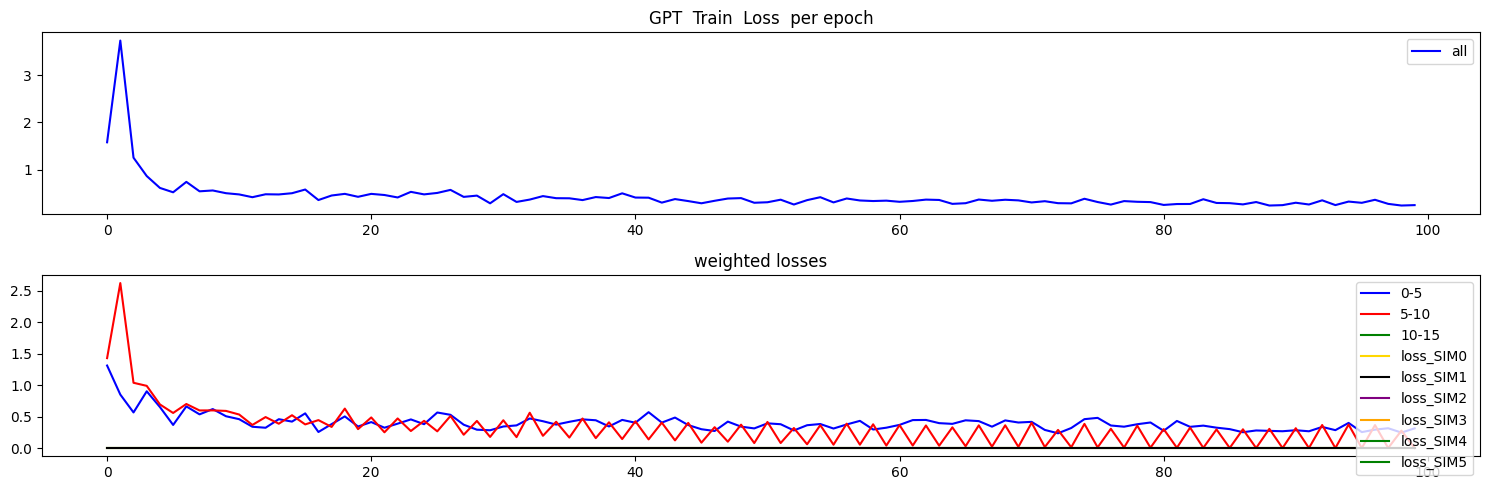

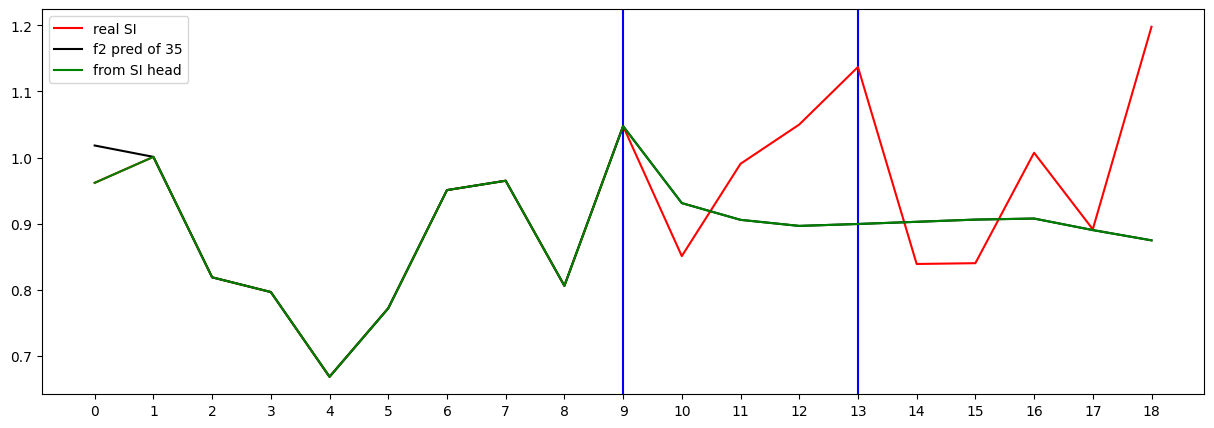

Testing R**2 - (all) - (no inputs):  0.9779033497926604
Testing R**2 - (f2) - SI full (no inputs):  -0.6261565051593501
Testing R**2 - SI head only (no inputs):  -0.6261565051593501
0 ...index R**2 (no inputs):  -0.14849026833080137
1 ...index R**2 (no inputs):  -0.6621000339602297
2 ...index R**2 (no inputs):  -0.6261565051593501
3 ...index R**2 (no inputs):  -13.225894991768163
4 ...index R**2 (no inputs):  -46.24355167361724
5 ...index R**2 (no inputs):  -105.06138207414527
6 ...index R**2 (no inputs):  -32.01931383054307
7 ...index R**2 (no inputs):  -8887.89552326928
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.16534493229976532
10 ...index R**2 (no inputs):  -0.13659549267287385
11 ...index R**2 (no inputs):  -8.617492825470128
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.36410649022787
16 ...index R**2 (no inputs):  -0.41275505785488487
17 ...index R**2 (no inputs)

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.364499
Loss_SI: 1.3196109533309937 Loss_all: 1.3868833780288696
===


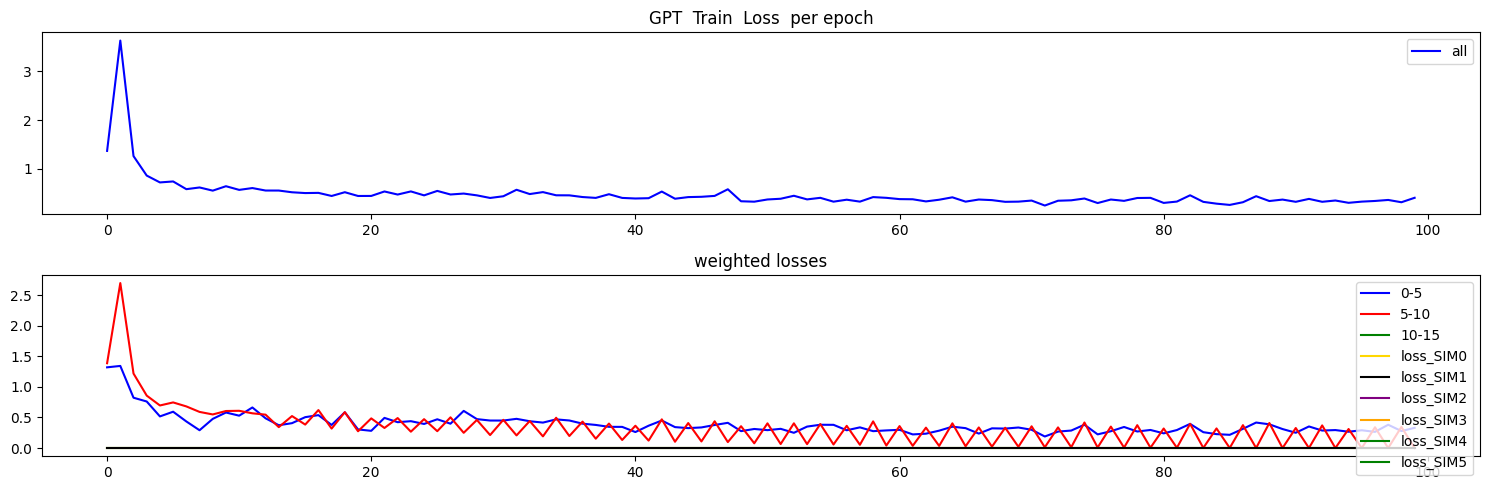

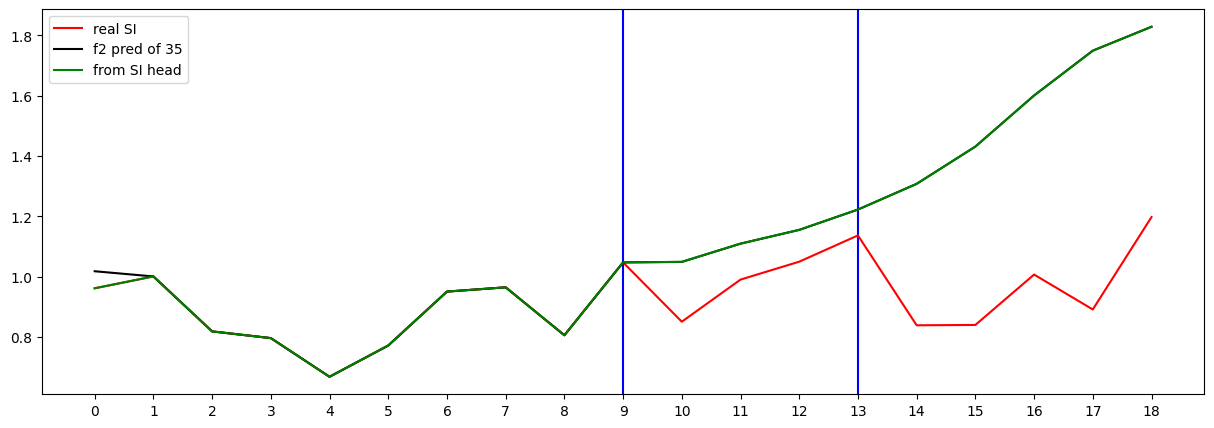

Testing R**2 - (all) - (no inputs):  0.8994261687401969
Testing R**2 - (f2) - SI full (no inputs):  -15.979775287728295
Testing R**2 - SI head only (no inputs):  -15.979775287728295
0 ...index R**2 (no inputs):  -0.25024320404017786
1 ...index R**2 (no inputs):  -3.852923050338081
2 ...index R**2 (no inputs):  -15.979775287728295
3 ...index R**2 (no inputs):  -2357.2117521773166
4 ...index R**2 (no inputs):  -2871.6889561533876
5 ...index R**2 (no inputs):  -457.0492732409662
6 ...index R**2 (no inputs):  -44.57028233106229
7 ...index R**2 (no inputs):  -56168.66124857965
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.014585187358258311
10 ...index R**2 (no inputs):  -0.20313796293660857
11 ...index R**2 (no inputs):  -33.86637203000004
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.0095168499104283
16 ...index R**2 (no inputs):  0.3874747101215775
17 ...index R**2 (no inputs)

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.384920
Loss_SI: 1.2554824352264404 Loss_all: 1.3294342756271362
===


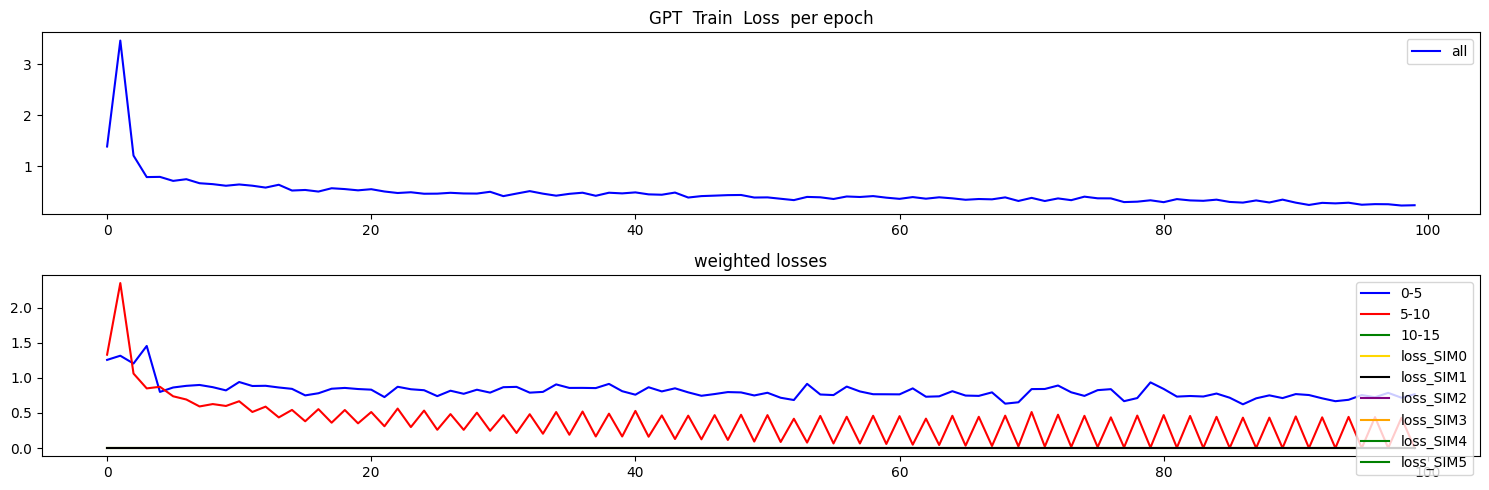

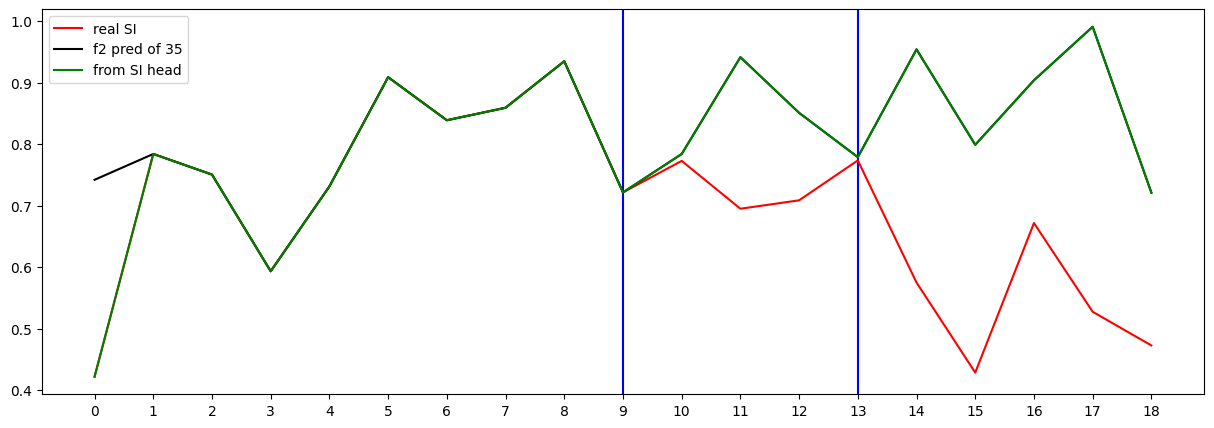

Testing R**2 - (all) - (no inputs):  0.985577103534295
Testing R**2 - (f2) - SI full (no inputs):  -5.553152028218122
Testing R**2 - SI head only (no inputs):  -5.553152028218122
0 ...index R**2 (no inputs):  -3.3559762433888682
1 ...index R**2 (no inputs):  -1.8780154950741306
2 ...index R**2 (no inputs):  -5.553152028218122
3 ...index R**2 (no inputs):  -13.168698450966536
4 ...index R**2 (no inputs):  -0.2913979551390402
5 ...index R**2 (no inputs):  -0.2190720712285752
6 ...index R**2 (no inputs):  -489.56351493551915
7 ...index R**2 (no inputs):  -167.35345355846317
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3951825827063389
10 ...index R**2 (no inputs):  -0.6977912807583833
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1319350850739118
16 ...index R**2 (no inputs):  0.2158527197992185
17 ...index R**2 (no inputs):  -130.1736671447

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.377089
Loss_SI: 1.4996134042739868 Loss_all: 1.2702800035476685
===


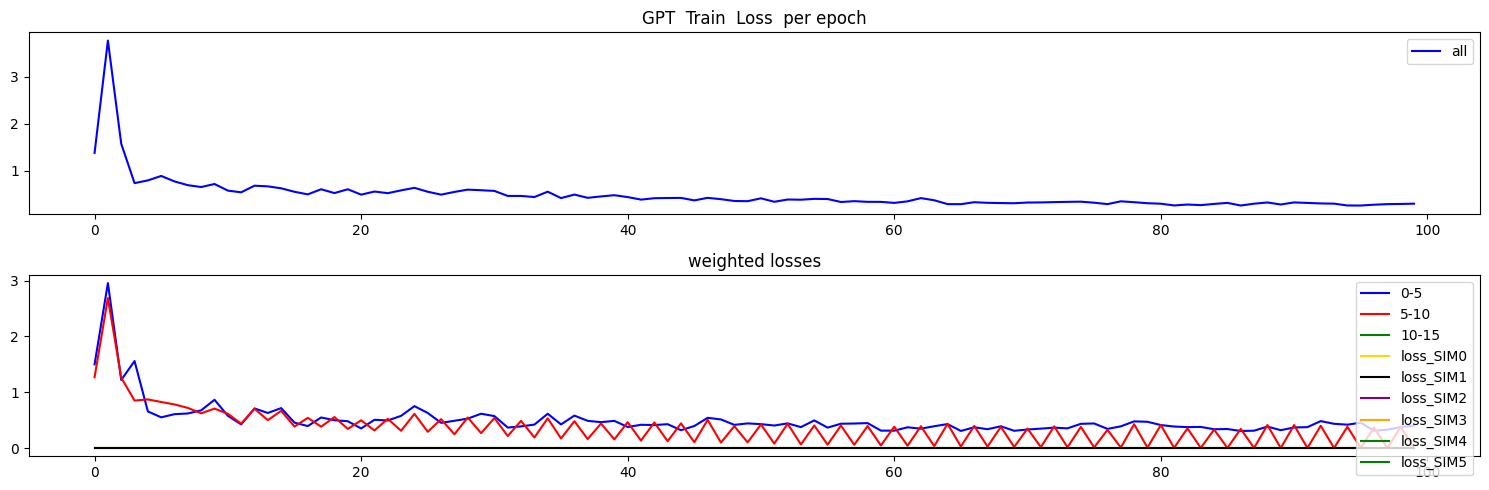

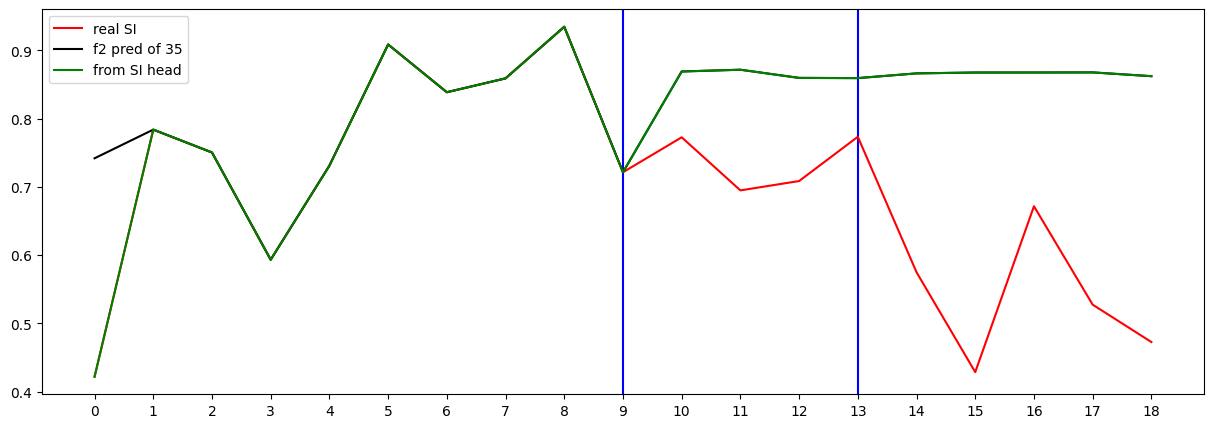

Testing R**2 - (all) - (no inputs):  0.9894202970296799
Testing R**2 - (f2) - SI full (no inputs):  -5.1175405613793465
Testing R**2 - SI head only (no inputs):  -5.1175405613793465
0 ...index R**2 (no inputs):  -0.15445958552919348
1 ...index R**2 (no inputs):  -0.8059294847972731
2 ...index R**2 (no inputs):  -5.1175405613793465
3 ...index R**2 (no inputs):  0.057482806190783275
4 ...index R**2 (no inputs):  -94.65769922038044
5 ...index R**2 (no inputs):  0.10744110604127777
6 ...index R**2 (no inputs):  -863.3958290030823
7 ...index R**2 (no inputs):  -544.6313188814057
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.04639187342334017
10 ...index R**2 (no inputs):  -0.1614829335127379
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8360796923591876
16 ...index R**2 (no inputs):  0.03879277432388495
17 ...index R**2 (no inputs):  -166.00983

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.047458
Loss_SI: 1.0374536514282227 Loss_all: 1.1367073059082031
===


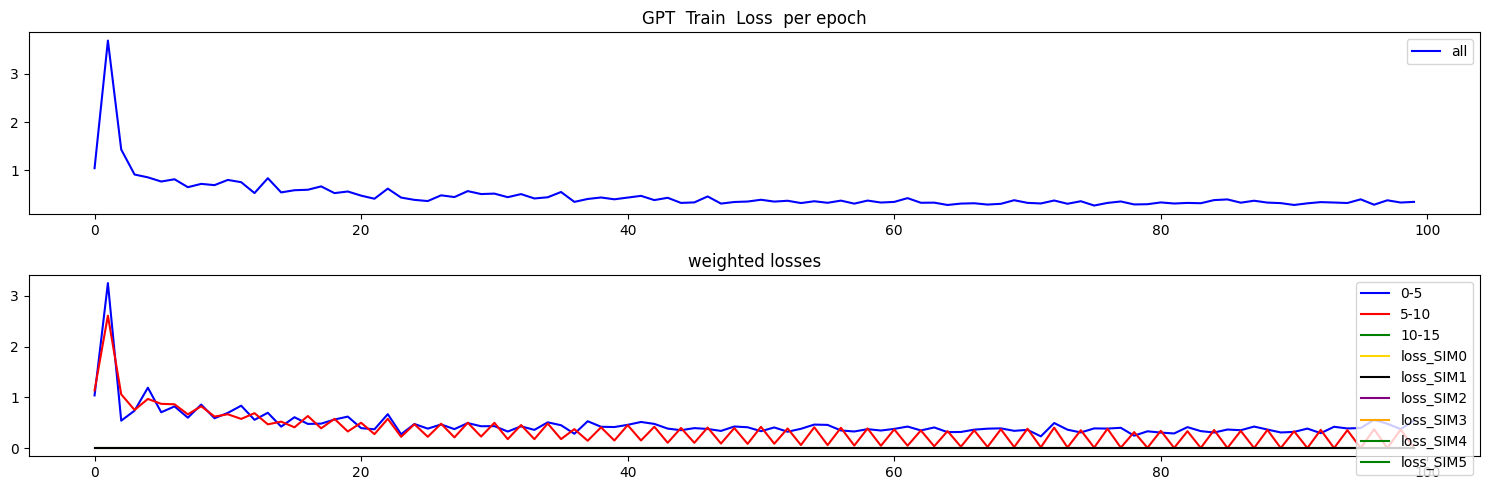

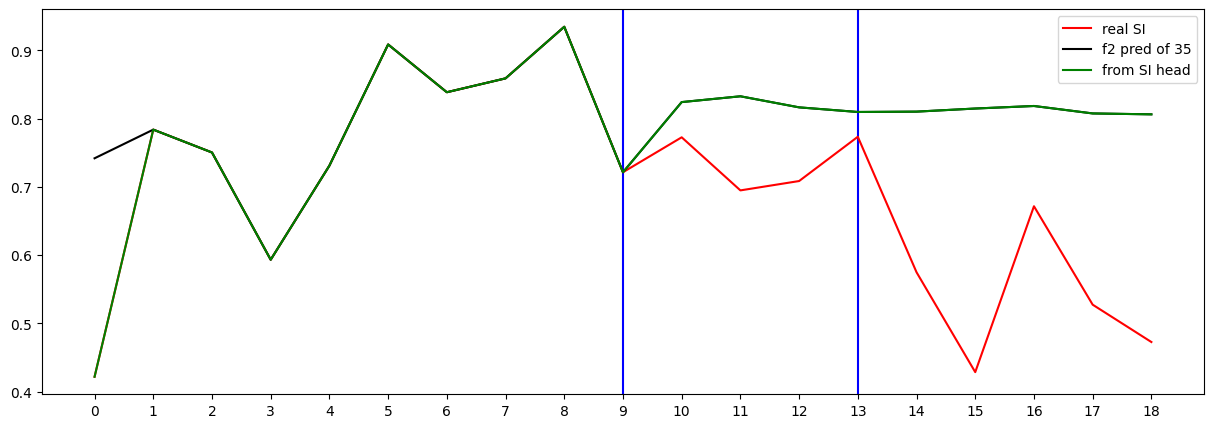

Testing R**2 - (all) - (no inputs):  0.9609198531764411
Testing R**2 - (f2) - SI full (no inputs):  -3.3650070998032
Testing R**2 - SI head only (no inputs):  -3.3650070998032
0 ...index R**2 (no inputs):  -0.6050912518321079
1 ...index R**2 (no inputs):  -1.9180722671435935
2 ...index R**2 (no inputs):  -3.3650070998032
3 ...index R**2 (no inputs):  -94.69832497595856
4 ...index R**2 (no inputs):  -242.4886319906289
5 ...index R**2 (no inputs):  -2.294789524226364
6 ...index R**2 (no inputs):  -431.82613950539513
7 ...index R**2 (no inputs):  -736.297762543947
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09640492896119679
10 ...index R**2 (no inputs):  0.08684978515078035
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.756181860730827
16 ...index R**2 (no inputs):  0.08196209312775449
17 ...index R**2 (no inputs):  -3694.2055053710938
18 .

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.347195
Loss_SI: 1.32453191280365 Loss_all: 1.2832586765289307
===


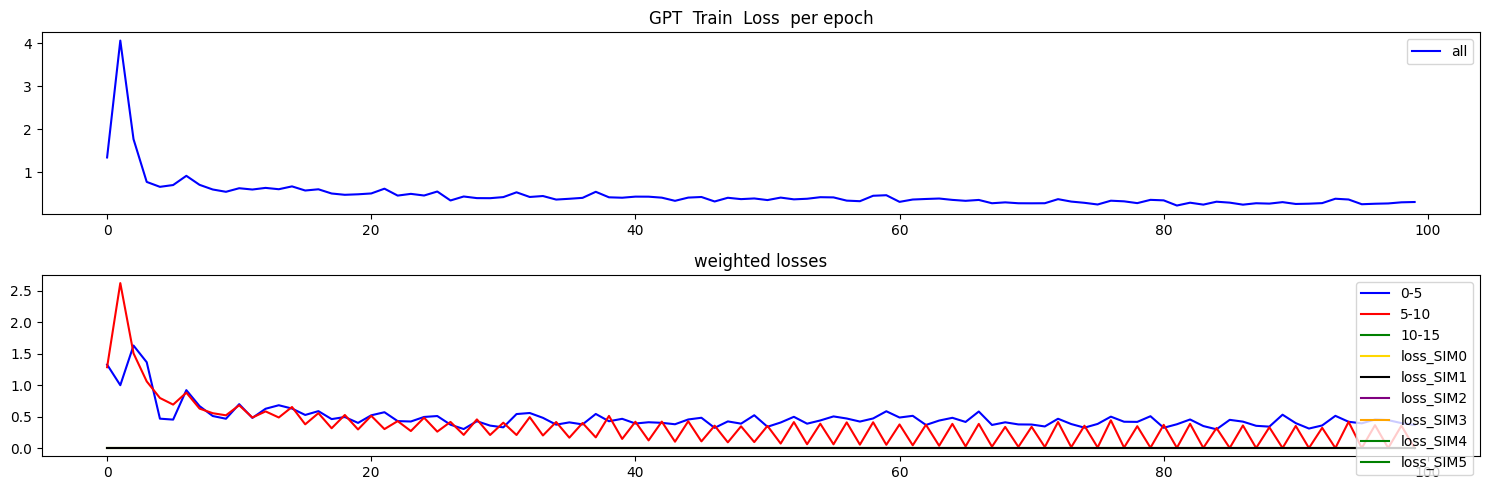

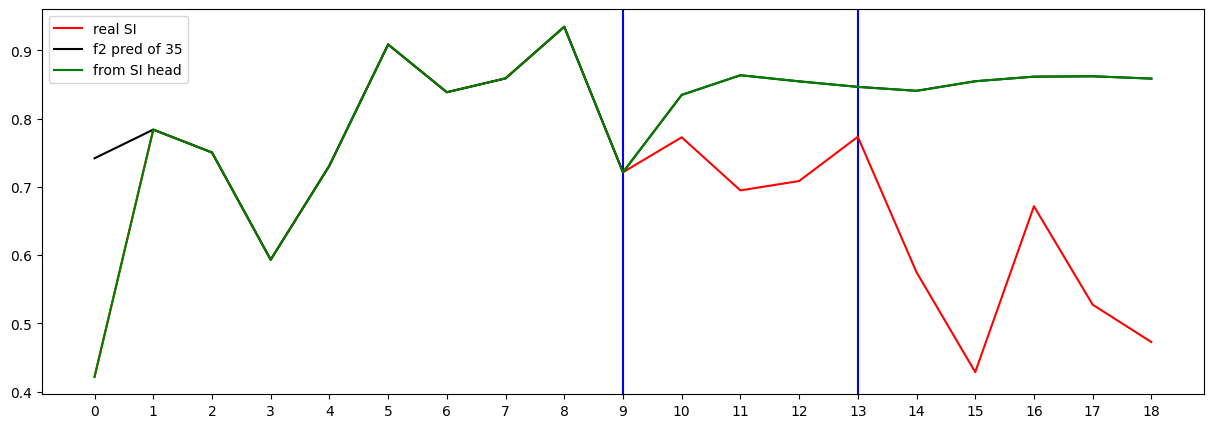

Testing R**2 - (all) - (no inputs):  0.984922949377412
Testing R**2 - (f2) - SI full (no inputs):  -4.684431351187929
Testing R**2 - SI head only (no inputs):  -4.684431351187929
0 ...index R**2 (no inputs):  -0.45937873625916437
1 ...index R**2 (no inputs):  -1.0304084757948035
2 ...index R**2 (no inputs):  -4.684431351187929
3 ...index R**2 (no inputs):  -15.547883354066617
4 ...index R**2 (no inputs):  -23.117890220097756
5 ...index R**2 (no inputs):  -0.26415694051320115
6 ...index R**2 (no inputs):  -164.8140028669602
7 ...index R**2 (no inputs):  -20351.806687183045
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.006435379520467688
10 ...index R**2 (no inputs):  -0.012192387104199565
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.446845977468973
16 ...index R**2 (no inputs):  -0.021105580719673833
17 ...index R**2 (no inputs):  -2167.03

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [35]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.137073
Loss_SI: 1.365814447402954 Loss_all: 1.1331796646118164
===


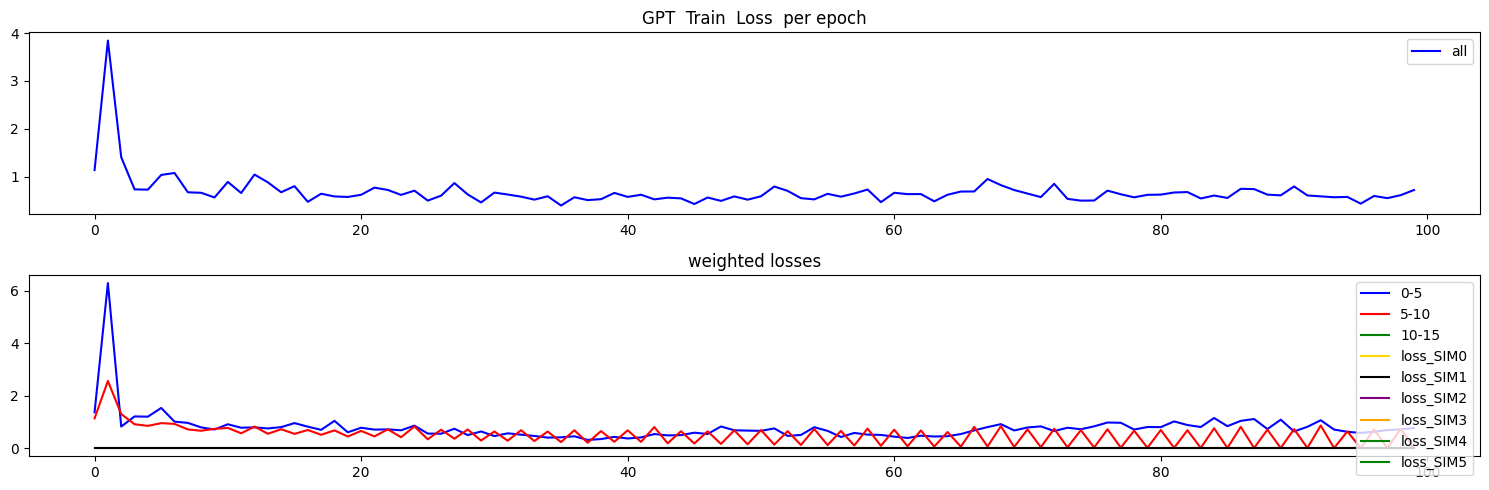

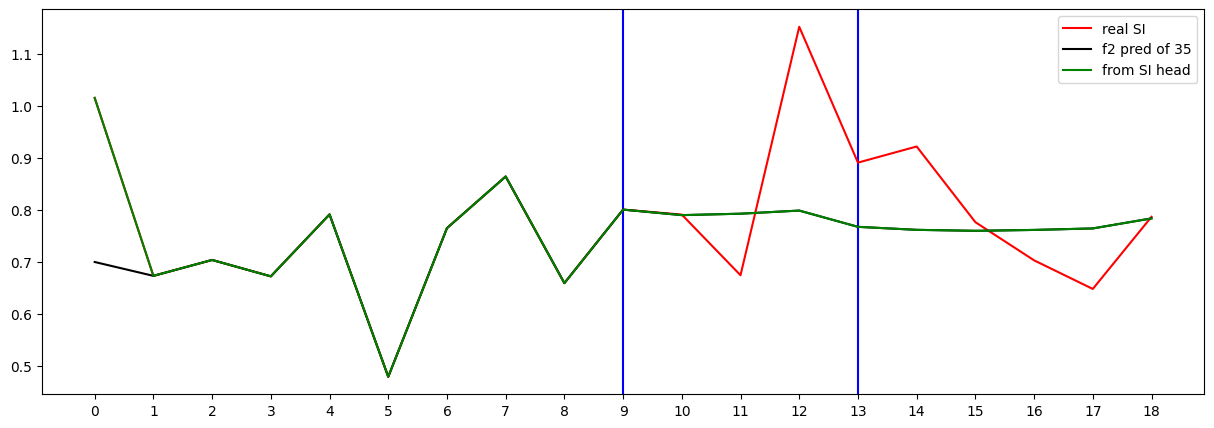

Testing R**2 - (all) - (no inputs):  0.9950335071157697
Testing R**2 - (f2) - SI full (no inputs):  -0.07919747067894578
Testing R**2 - SI head only (no inputs):  -0.07919747067894578
0 ...index R**2 (no inputs):  -0.02523388547647132
1 ...index R**2 (no inputs):  -1.2570954852846268
2 ...index R**2 (no inputs):  -0.07919747067894578
3 ...index R**2 (no inputs):  -4.010719770989379
4 ...index R**2 (no inputs):  -3.451026683462098
5 ...index R**2 (no inputs):  -0.015129654851692376
6 ...index R**2 (no inputs):  -0.09768630152077318
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.12026296985497176
10 ...index R**2 (no inputs):  -0.2637576796337515
11 ...index R**2 (no inputs):  -20.978012374656437
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1913114001076592
16 ...index R**2 (no inputs):  -0.05227769045247399
17 ...index R**2 (no inputs):  -22

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.124513
Loss_SI: 1.2936800718307495 Loss_all: 1.109304666519165
===


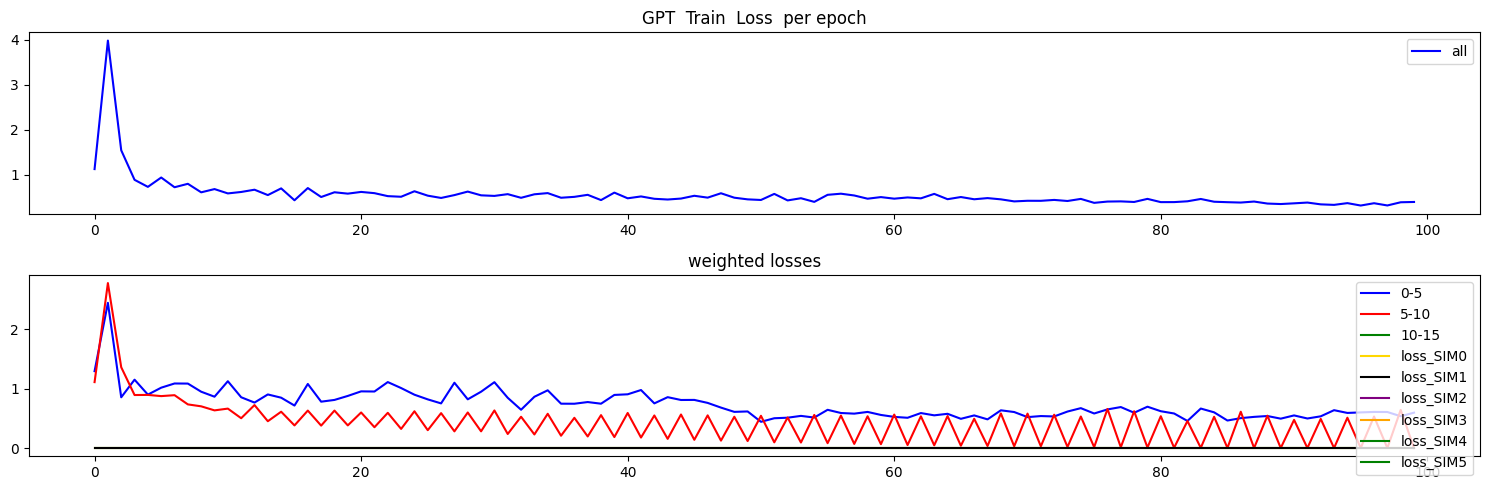

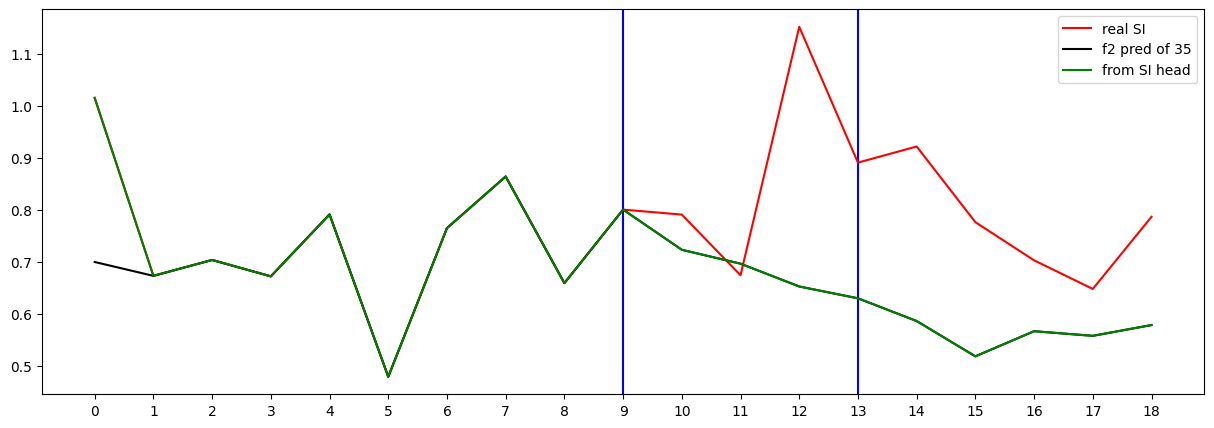

Testing R**2 - (all) - (no inputs):  0.9917214161211324
Testing R**2 - (f2) - SI full (no inputs):  -1.9544536849471381
Testing R**2 - SI head only (no inputs):  -1.9544536849471381
0 ...index R**2 (no inputs):  -0.20818449130352934
1 ...index R**2 (no inputs):  -3.7226017771133186
2 ...index R**2 (no inputs):  -1.9544536849471381
3 ...index R**2 (no inputs):  -6.174214510306809
4 ...index R**2 (no inputs):  -29.26460251327465
5 ...index R**2 (no inputs):  -0.5643207249771807
6 ...index R**2 (no inputs):  -0.012082279222082049
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09197486801479449
10 ...index R**2 (no inputs):  -0.12631467587041278
11 ...index R**2 (no inputs):  -7.463791596346313
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.325855327844702
16 ...index R**2 (no inputs):  -0.033889141211768115
17 ...index R**2 (no inputs):  -356.98

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.094039
Loss_SI: 1.2825101613998413 Loss_all: 1.2009449005126953
===


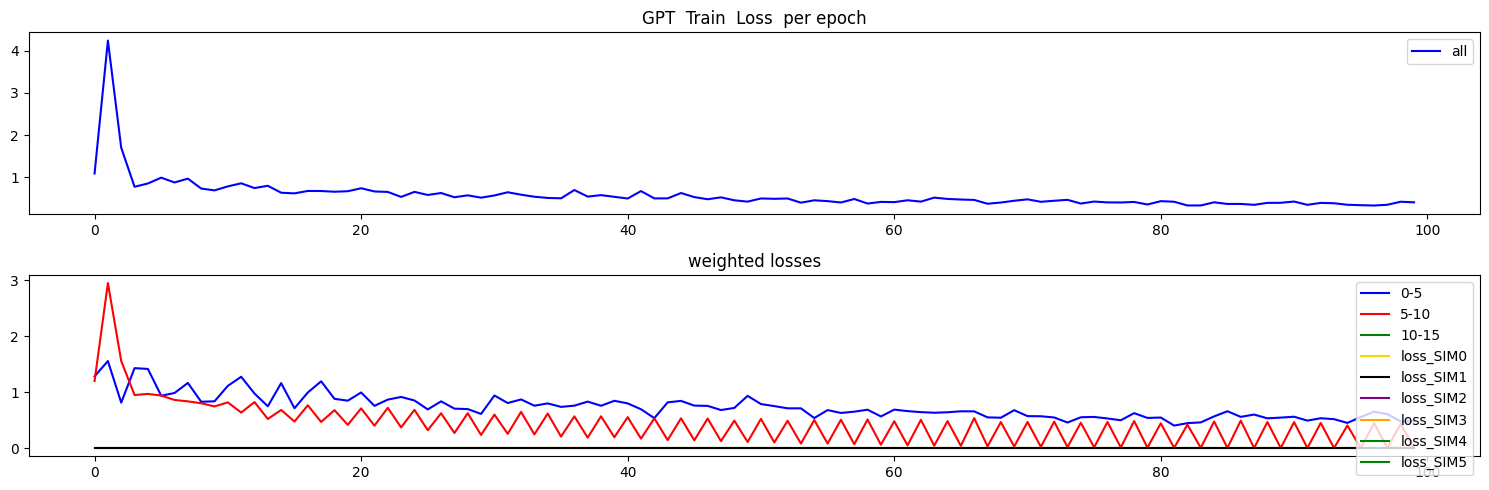

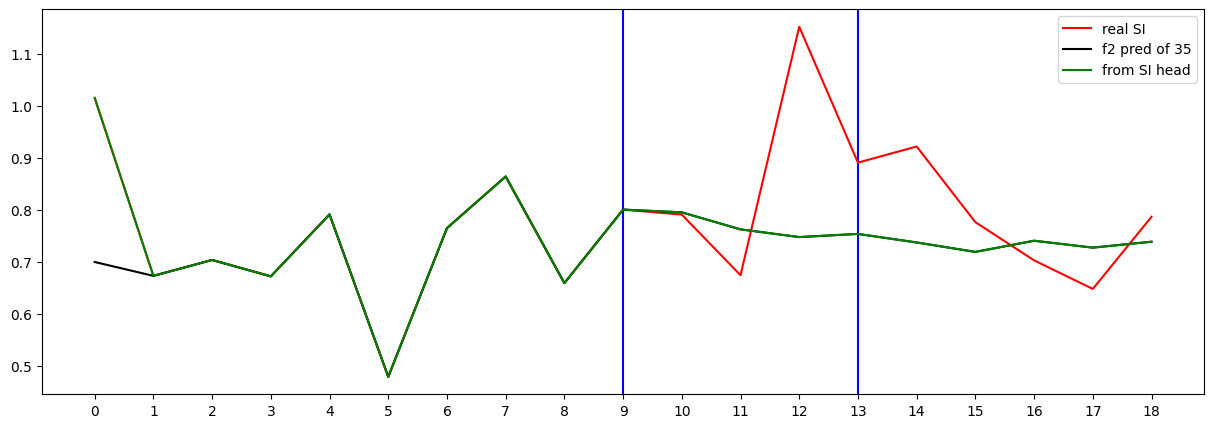

Testing R**2 - (all) - (no inputs):  0.9923706125392082
Testing R**2 - (f2) - SI full (no inputs):  -0.3433764209436214
Testing R**2 - SI head only (no inputs):  -0.3433764209436214
0 ...index R**2 (no inputs):  -0.009417362754172931
1 ...index R**2 (no inputs):  -1.460048645539755
2 ...index R**2 (no inputs):  -0.3433764209436214
3 ...index R**2 (no inputs):  -1.4536129349956002
4 ...index R**2 (no inputs):  -0.30459529935360496
5 ...index R**2 (no inputs):  -0.5413877274829875
6 ...index R**2 (no inputs):  0.001350714622402438
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.263183070161761
10 ...index R**2 (no inputs):  -0.15153477518469738
11 ...index R**2 (no inputs):  -35.64455069265578
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7985242149245306
16 ...index R**2 (no inputs):  -0.12791643350165938
17 ...index R**2 (no inputs):  -88.255

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.197140
Loss_SI: 1.6552727222442627 Loss_all: 1.324927568435669
===


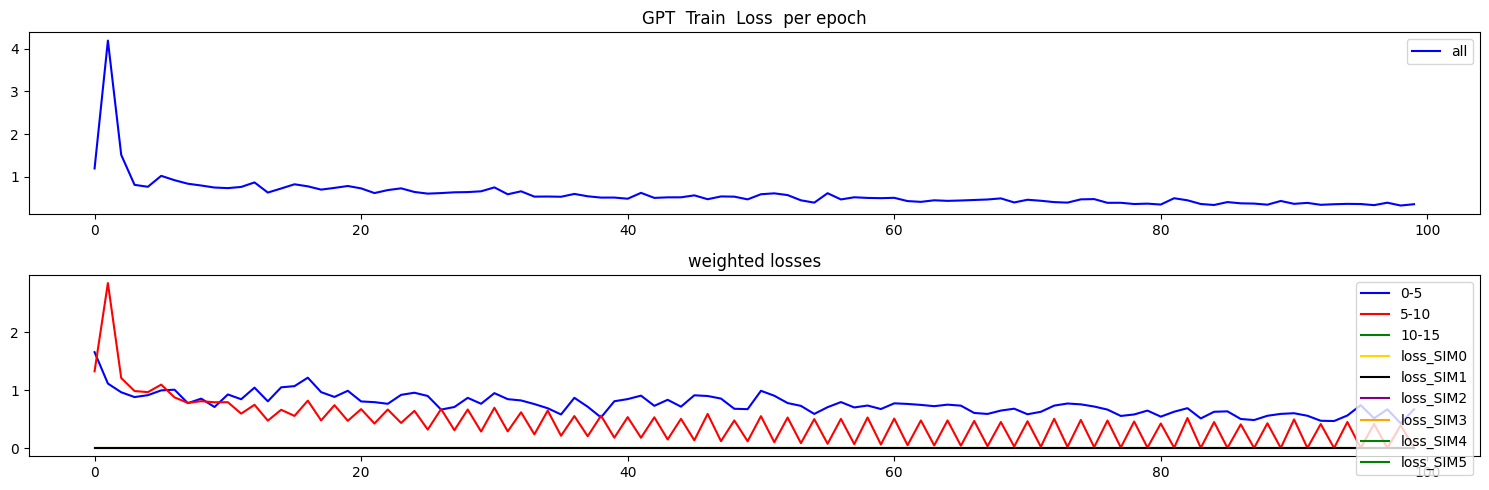

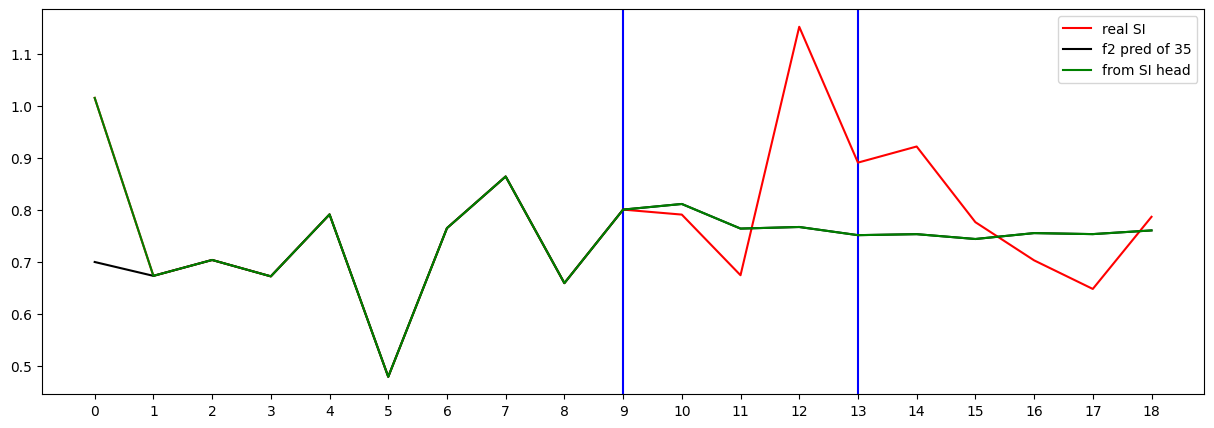

Testing R**2 - (all) - (no inputs):  0.9941562544386501
Testing R**2 - (f2) - SI full (no inputs):  -0.29073693408719503
Testing R**2 - SI head only (no inputs):  -0.29073693408719503
0 ...index R**2 (no inputs):  -0.012022828933079488
1 ...index R**2 (no inputs):  -2.06361127299609
2 ...index R**2 (no inputs):  -0.29073693408719503
3 ...index R**2 (no inputs):  -3.5342988947349623
4 ...index R**2 (no inputs):  -0.7711881928720732
5 ...index R**2 (no inputs):  -0.2032250046380928
6 ...index R**2 (no inputs):  -0.359799497094339
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.07998112510702415
10 ...index R**2 (no inputs):  -0.18098873106720892
11 ...index R**2 (no inputs):  -13.57894506983293
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.2888661647789785
16 ...index R**2 (no inputs):  -0.043368058493375994
17 ...index R**2 (no inputs):  -0.82

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [40]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.131899
Loss_SI: 1.3983879089355469 Loss_all: 1.2098636627197266
===


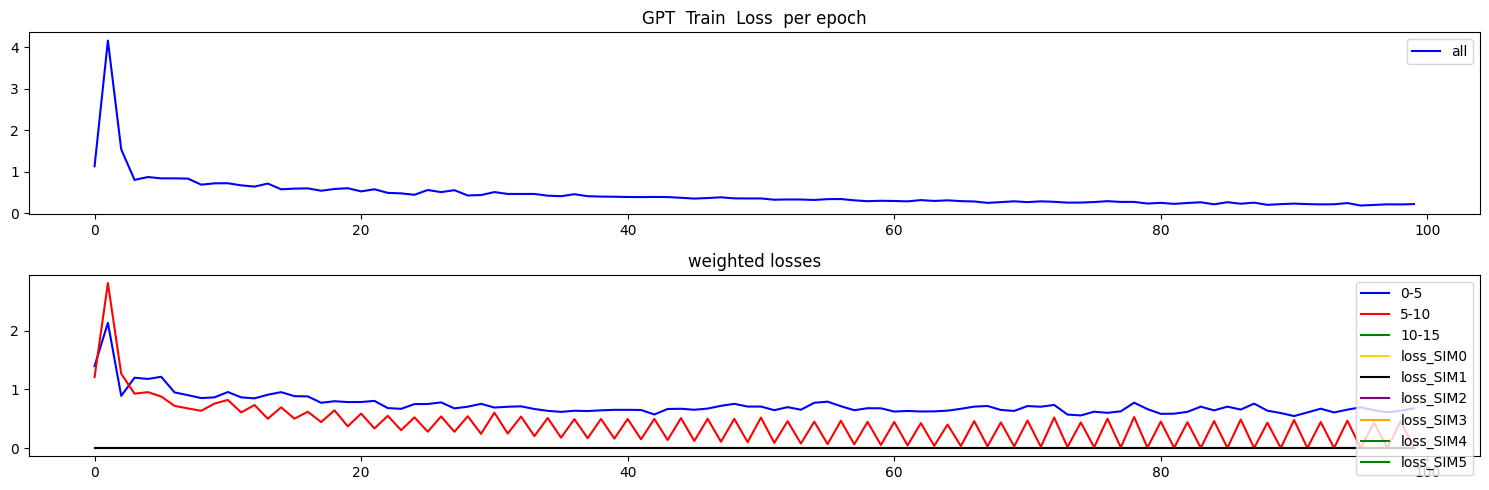

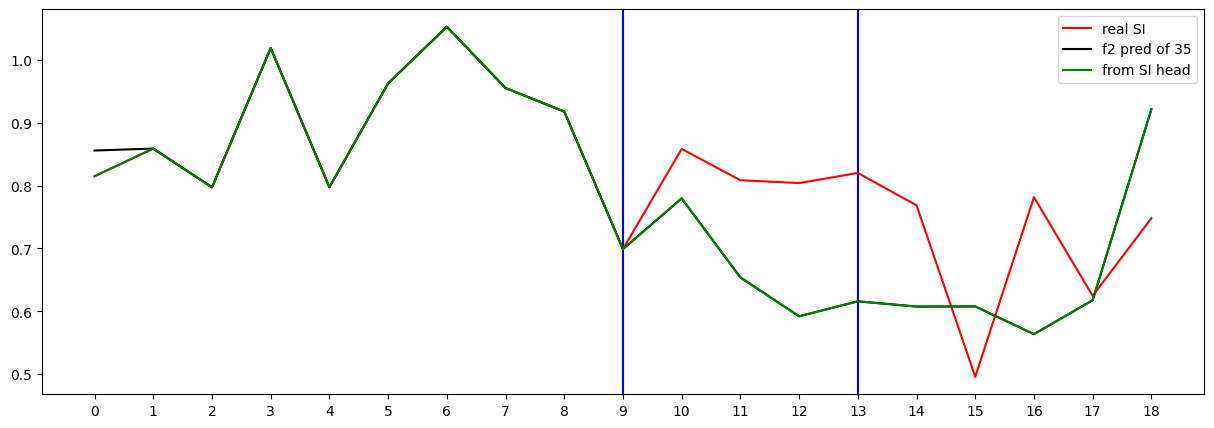

Testing R**2 - (all) - (no inputs):  0.9733469656606595
Testing R**2 - (f2) - SI full (no inputs):  -0.8001474858040751
Testing R**2 - SI head only (no inputs):  -0.8001474858040751
0 ...index R**2 (no inputs):  -0.597396434917671
1 ...index R**2 (no inputs):  0.3920820994485562
2 ...index R**2 (no inputs):  -0.8001474858040751
3 ...index R**2 (no inputs):  -46.65474113430943
4 ...index R**2 (no inputs):  -15.1951641502941
5 ...index R**2 (no inputs):  -6.7364569040340765
6 ...index R**2 (no inputs):  -84.32147284308881
7 ...index R**2 (no inputs):  -848.4427055520572
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.0749023313815751
10 ...index R**2 (no inputs):  -2.1498120955349793
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.311307751207146
16 ...index R**2 (no inputs):  -12.774222307325735
17 ...index R**2 (no inputs):  -38.14957212607066

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.281202
Loss_SI: 1.236669898033142 Loss_all: 1.4226399660110474
===


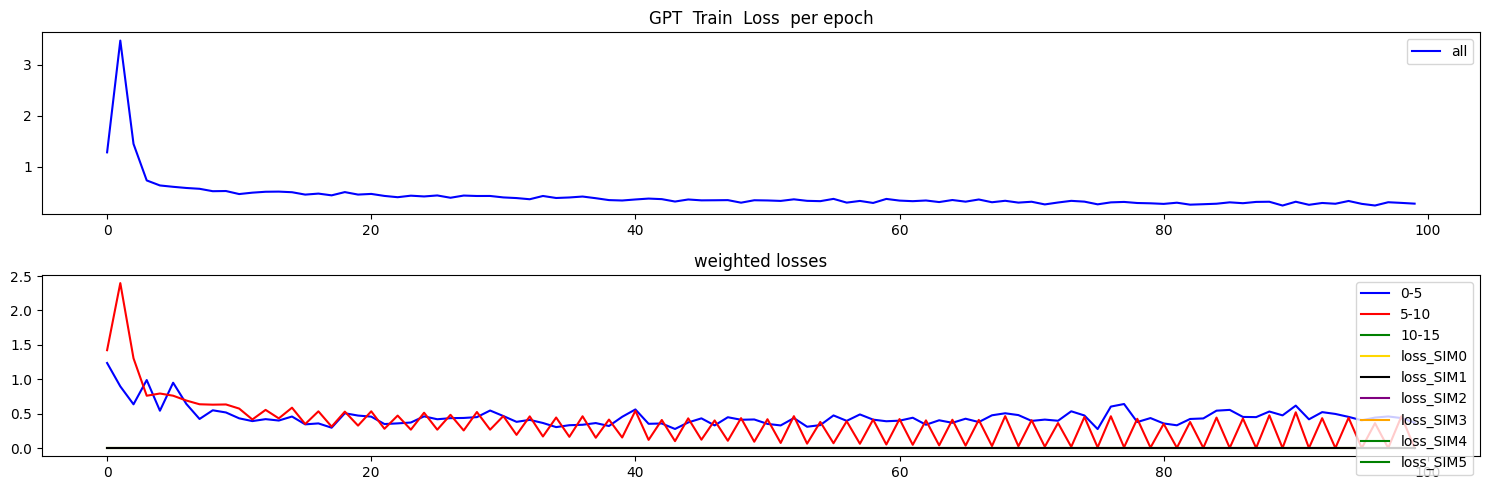

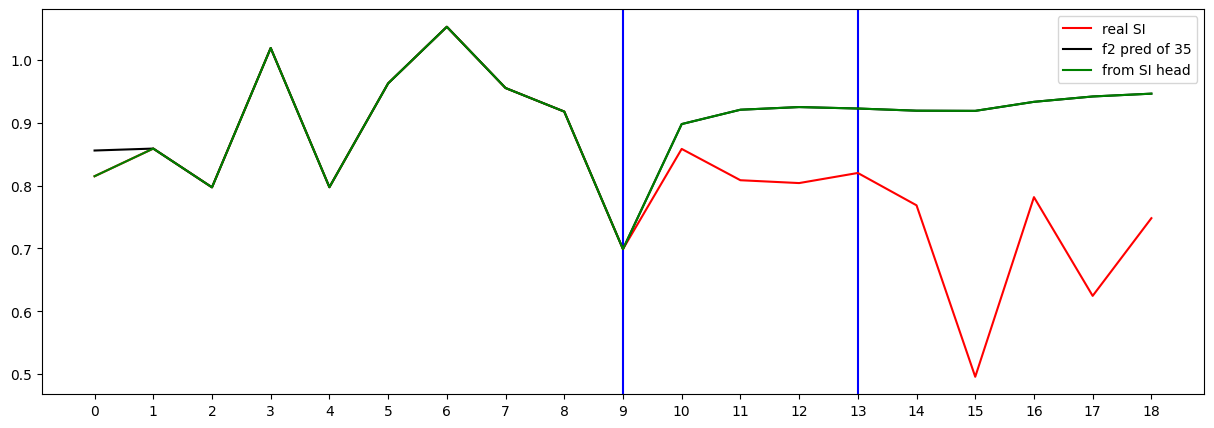

Testing R**2 - (all) - (no inputs):  0.9917155602883762
Testing R**2 - (f2) - SI full (no inputs):  -3.1961589964456802
Testing R**2 - SI head only (no inputs):  -3.1961589964456802
0 ...index R**2 (no inputs):  -0.023334607610300928
1 ...index R**2 (no inputs):  -1.77494082830049
2 ...index R**2 (no inputs):  -3.1961589964456802
3 ...index R**2 (no inputs):  -15.294947099818149
4 ...index R**2 (no inputs):  -142.87216533214308
5 ...index R**2 (no inputs):  -1.3866389761136149
6 ...index R**2 (no inputs):  -2444.7129583527258
7 ...index R**2 (no inputs):  -9272.031506055053
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.017327147622870465
10 ...index R**2 (no inputs):  -0.28820249740184734
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.3048530083121963
16 ...index R**2 (no inputs):  -0.41712428122284906
17 ...index R**2 (no inputs):  -118.53

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.666968
Loss_SI: 1.8093498945236206 Loss_all: 1.5461221933364868
===


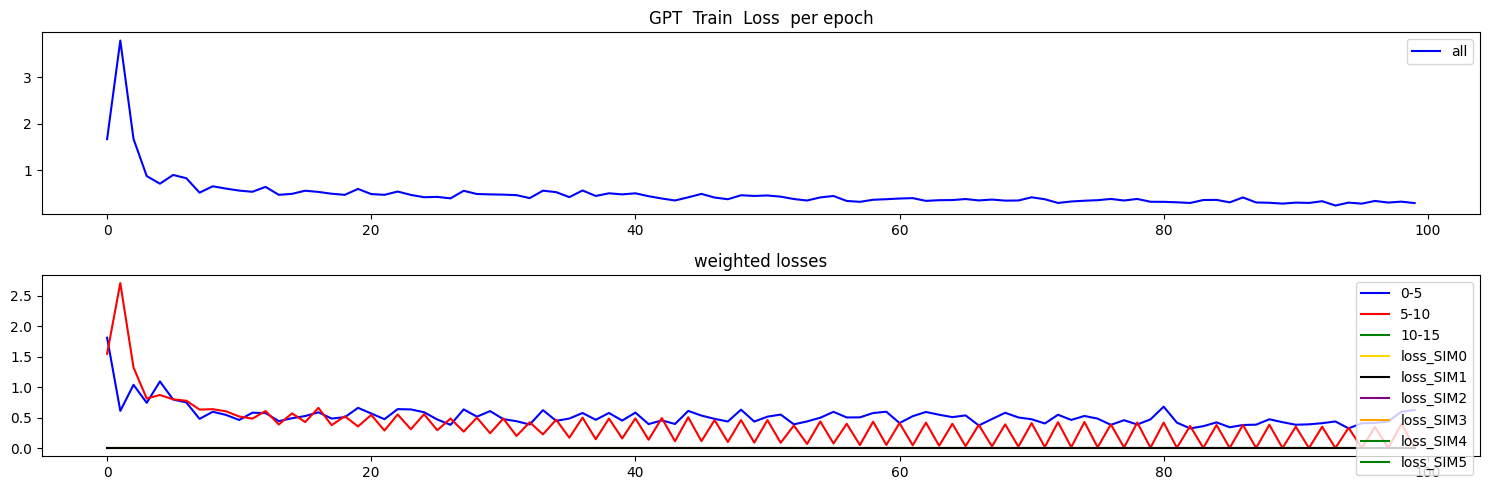

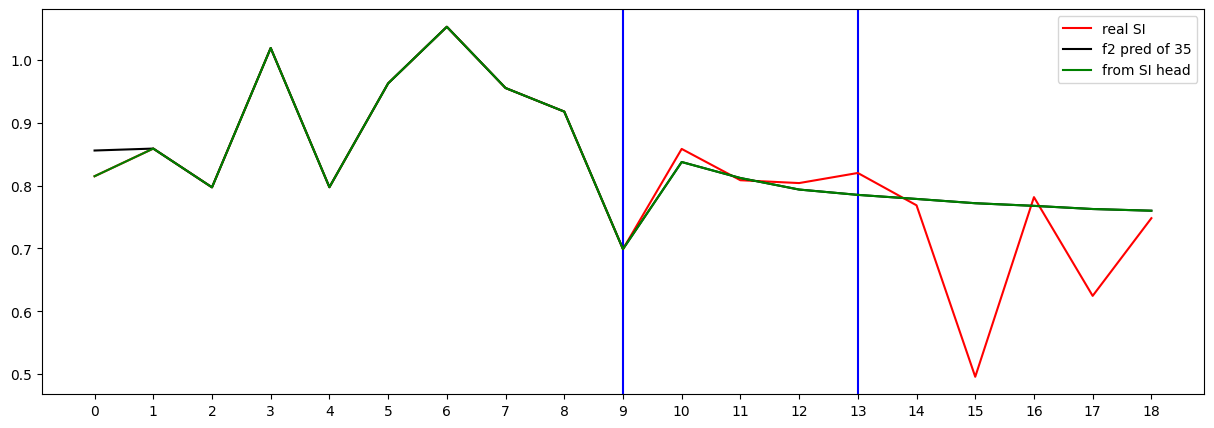

Testing R**2 - (all) - (no inputs):  0.9884471173699988
Testing R**2 - (f2) - SI full (no inputs):  -0.09718065771789264
Testing R**2 - SI head only (no inputs):  -0.09718065771789264
0 ...index R**2 (no inputs):  -0.06989145597056323
1 ...index R**2 (no inputs):  0.08849052382732059
2 ...index R**2 (no inputs):  -0.09718065771789264
3 ...index R**2 (no inputs):  -39.66162569152817
4 ...index R**2 (no inputs):  -828.6173230525046
5 ...index R**2 (no inputs):  -2.3366138495252002
6 ...index R**2 (no inputs):  -200.1061561271517
7 ...index R**2 (no inputs):  -94964.07857707591
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.525633806549473
10 ...index R**2 (no inputs):  -0.09820581596316424
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.03308296970289493
16 ...index R**2 (no inputs):  -0.011395675900336855
17 ...index R**2 (no inputs):  -51.4610

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.106726
Loss_SI: 1.1340522766113281 Loss_all: 1.156124234199524
===


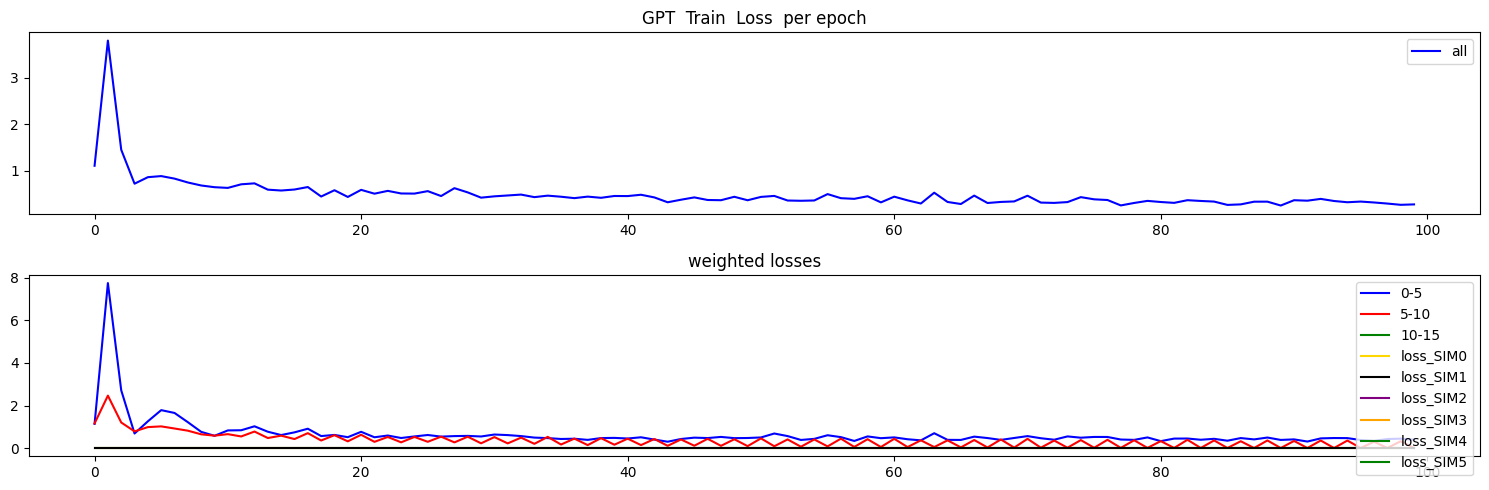

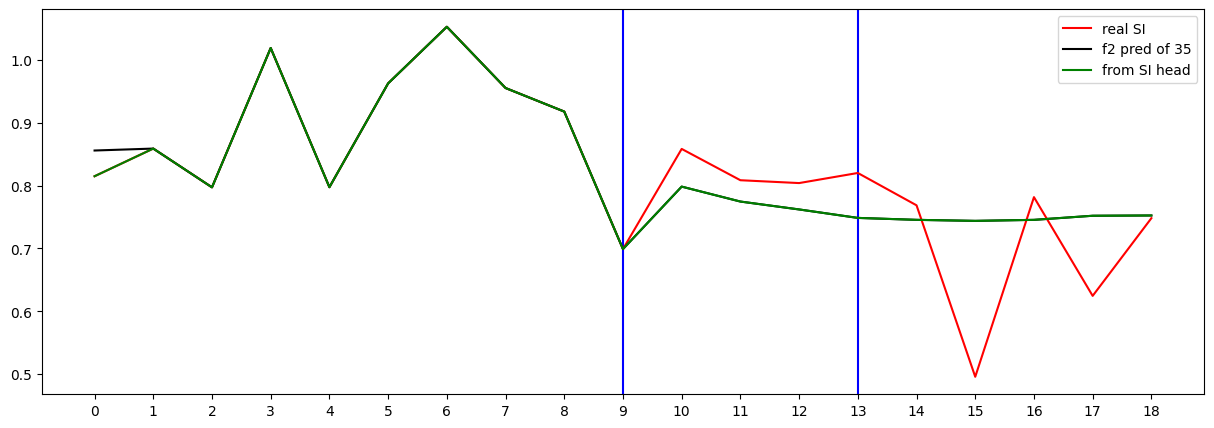

Testing R**2 - (all) - (no inputs):  0.9968106003273967
Testing R**2 - (f2) - SI full (no inputs):  0.09689130097064469
Testing R**2 - SI head only (no inputs):  0.09689130097064469
0 ...index R**2 (no inputs):  -0.015250929473535901
1 ...index R**2 (no inputs):  -0.36714856355251757
2 ...index R**2 (no inputs):  0.09689130097064469
3 ...index R**2 (no inputs):  -11.729060402266908
4 ...index R**2 (no inputs):  -5554.846211372451
5 ...index R**2 (no inputs):  0.22067748969203338
6 ...index R**2 (no inputs):  -2278.880231516773
7 ...index R**2 (no inputs):  -402055.71285444166
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.675444508282274
10 ...index R**2 (no inputs):  -0.4558598287679909
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.19788947771793963
16 ...index R**2 (no inputs):  -0.9381316910894784
17 ...index R**2 (no inputs):  -6309.178

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [45]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.204102
Loss_SI: 1.0855120420455933 Loss_all: 1.127478837966919
===


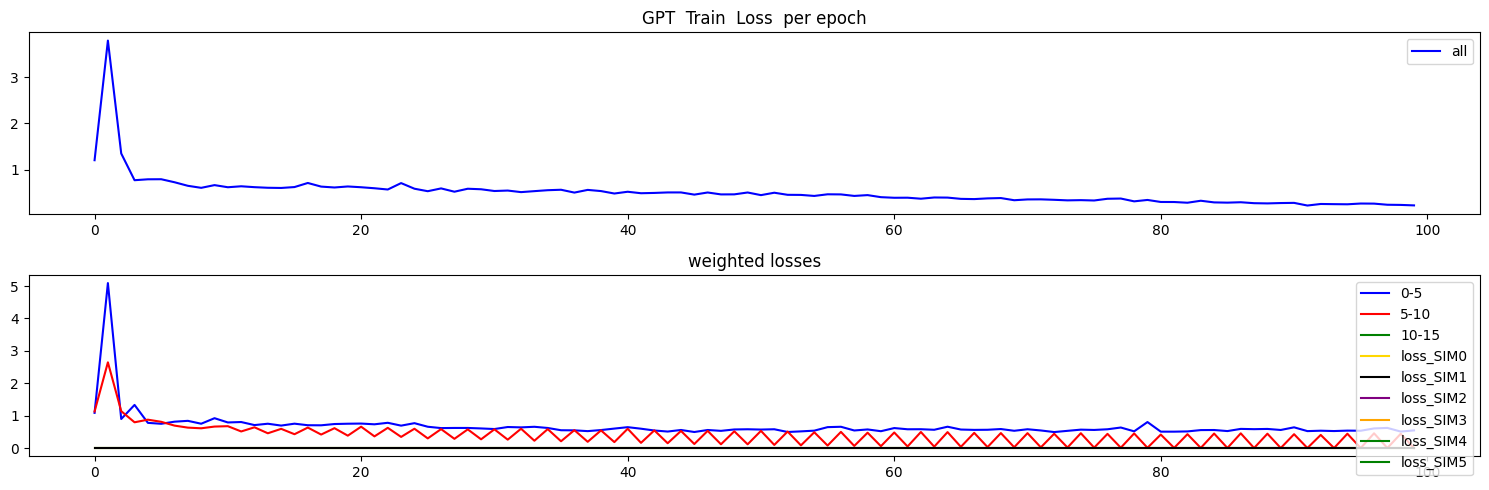

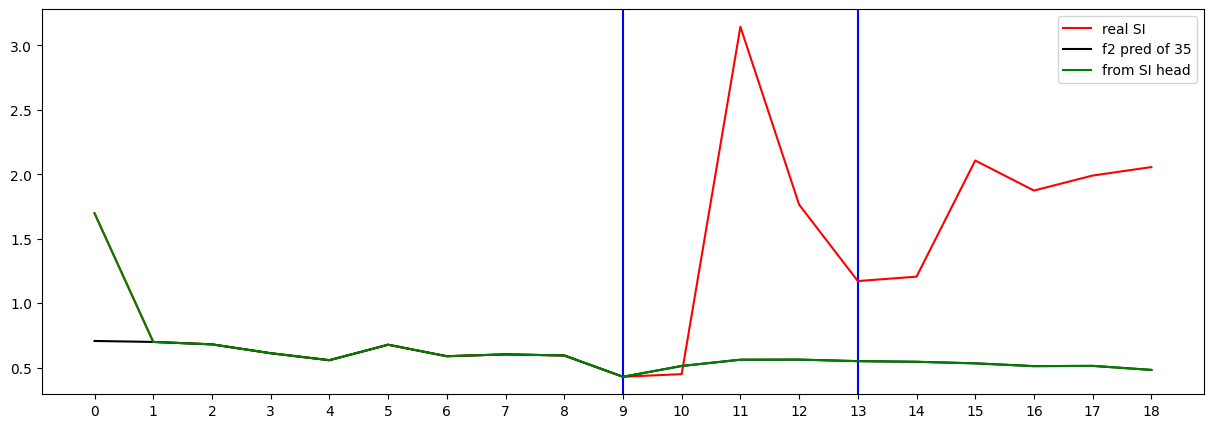

Testing R**2 - (all) - (no inputs):  -0.31434517932147843
Testing R**2 - (f2) - SI full (no inputs):  -6.216312195748833
Testing R**2 - SI head only (no inputs):  -6.216312195748833
0 ...index R**2 (no inputs):  -0.055444854086841744
1 ...index R**2 (no inputs):  -8.024221224007004
2 ...index R**2 (no inputs):  -6.216312195748833
3 ...index R**2 (no inputs):  -0.771913073211256
4 ...index R**2 (no inputs):  -0.08541306324106523
5 ...index R**2 (no inputs):  -2.5424963405187984
6 ...index R**2 (no inputs):  -0.9977131653273841
7 ...index R**2 (no inputs):  -3.3967764002102605
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.6018277358779107
10 ...index R**2 (no inputs):  -0.0505240890026446
11 ...index R**2 (no inputs):  -7.571329749072815
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  -1.1515686590410668
15 ...index R**2 (no inputs):  0.04748041734674979
16 ...index R**2 (no inputs):  -0.5583168225381583
17 ...inde

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.208701
Loss_SI: 1.4741909503936768 Loss_all: 1.2663846015930176
===


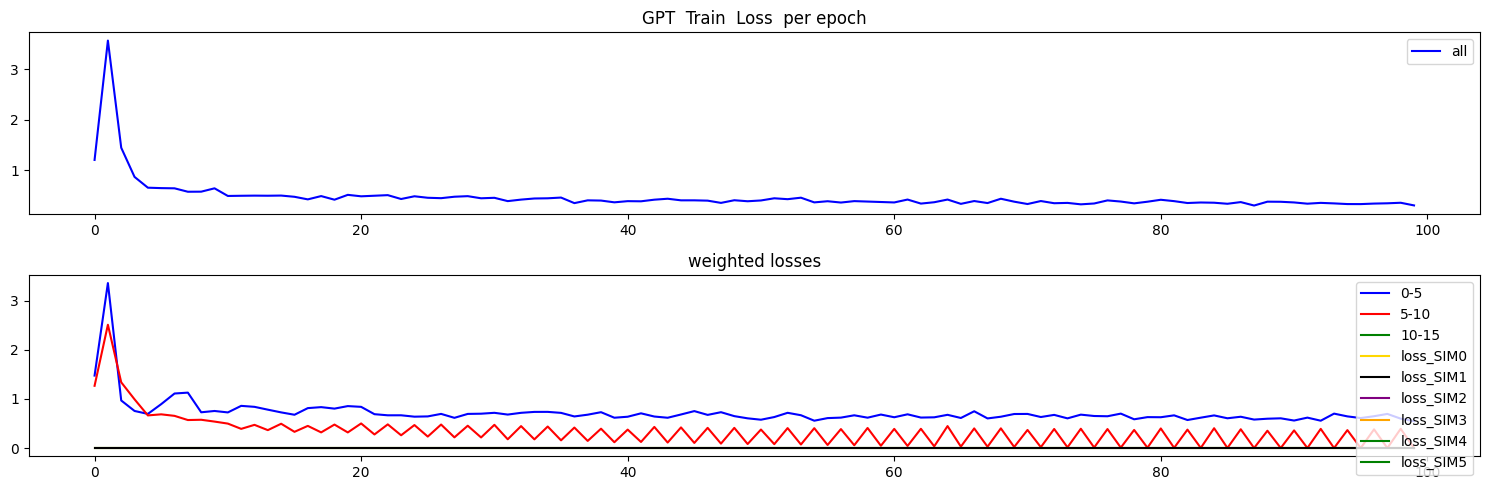

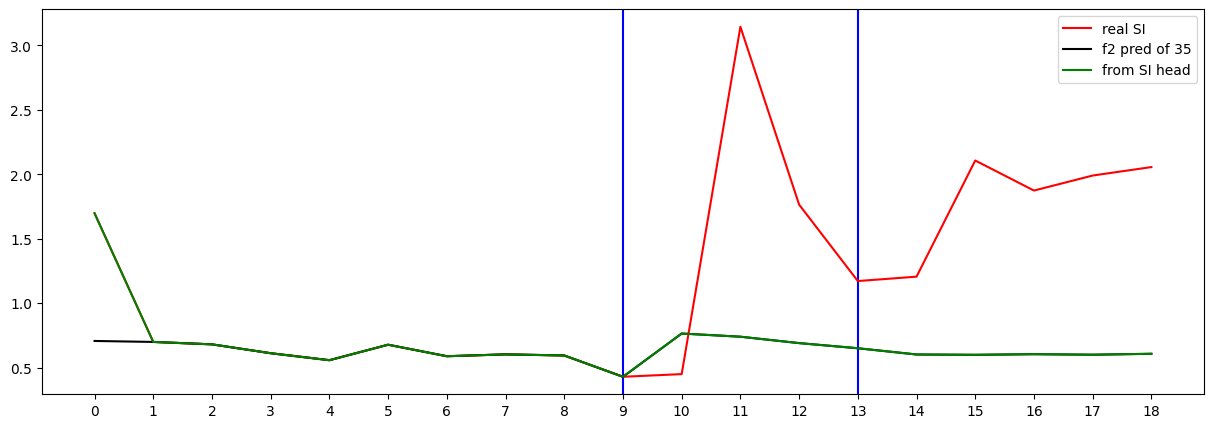

Testing R**2 - (all) - (no inputs):  -0.5799905008927939
Testing R**2 - (f2) - SI full (no inputs):  -5.073838251544488
Testing R**2 - SI head only (no inputs):  -5.073838251544488
0 ...index R**2 (no inputs):  -0.005069208011951654
1 ...index R**2 (no inputs):  -8.400306719859822
2 ...index R**2 (no inputs):  -5.073838251544488
3 ...index R**2 (no inputs):  -0.955401146614067
4 ...index R**2 (no inputs):  -0.013442878982497186
5 ...index R**2 (no inputs):  -3.2369199553067256
6 ...index R**2 (no inputs):  -0.670590083261819
7 ...index R**2 (no inputs):  -0.9590268391028245
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.00026796877042789546
10 ...index R**2 (no inputs):  0.005585495991535683
11 ...index R**2 (no inputs):  -8.428944865815199
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  -1.1520137717557049
15 ...index R**2 (no inputs):  -0.3916776428453086
16 ...index R**2 (no inputs):  -0.3751628146632793
17 ...

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.183345
Loss_SI: 1.2697546482086182 Loss_all: 1.2129693031311035
===


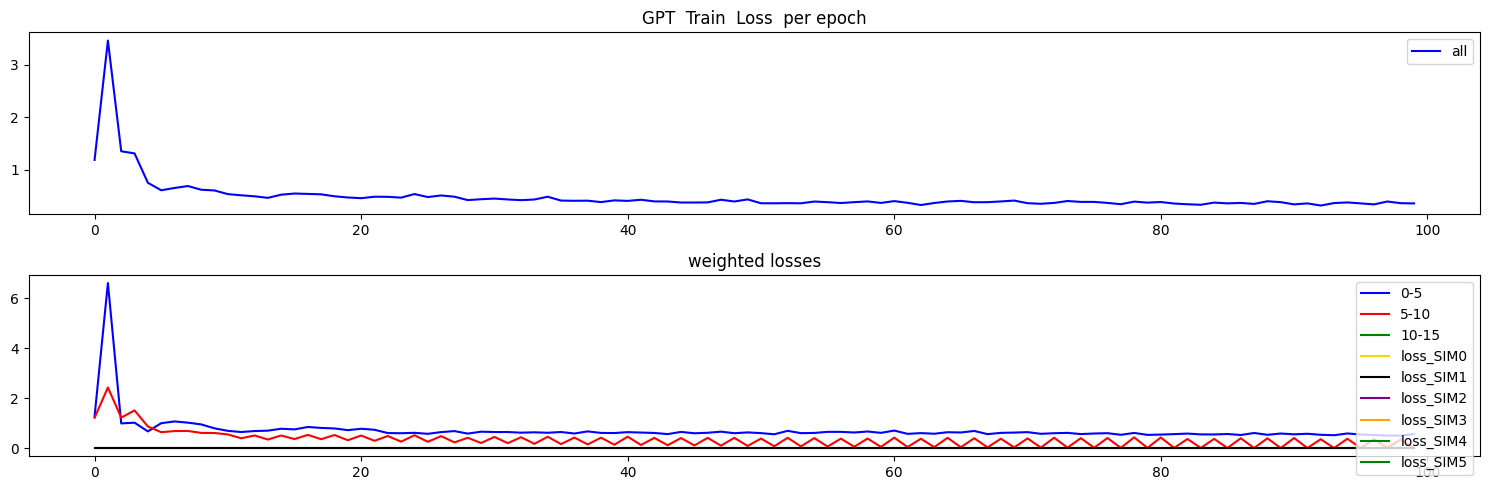

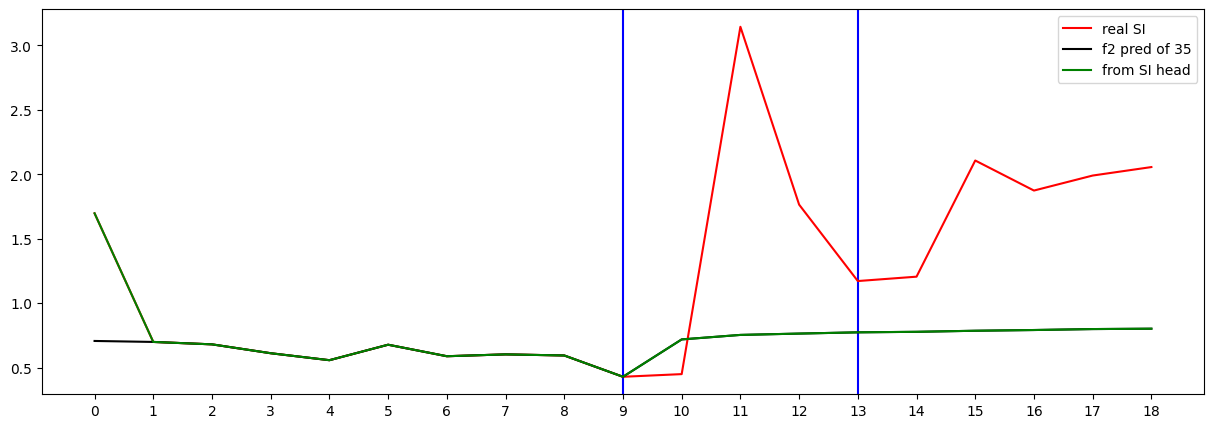

Testing R**2 - (all) - (no inputs):  -0.6402864496558862
Testing R**2 - (f2) - SI full (no inputs):  -4.203099242314118
Testing R**2 - SI head only (no inputs):  -4.203099242314118
0 ...index R**2 (no inputs):  0.007272349070118533
1 ...index R**2 (no inputs):  -6.555229567379445
2 ...index R**2 (no inputs):  -4.203099242314118
3 ...index R**2 (no inputs):  -1.036647617884114
4 ...index R**2 (no inputs):  -0.11165203957189229
5 ...index R**2 (no inputs):  -3.409256959355342
6 ...index R**2 (no inputs):  -2.0221767943235087
7 ...index R**2 (no inputs):  -1.5507243755157591
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.21605465599791196
10 ...index R**2 (no inputs):  -0.6077726120314582
11 ...index R**2 (no inputs):  -42.21568352327332
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  -1.152075361225502
15 ...index R**2 (no inputs):  -0.16727818125607485
16 ...index R**2 (no inputs):  -0.36195548274038214
17 ...index

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.372967
Loss_SI: 1.3705071210861206 Loss_all: 1.3339532613754272
===


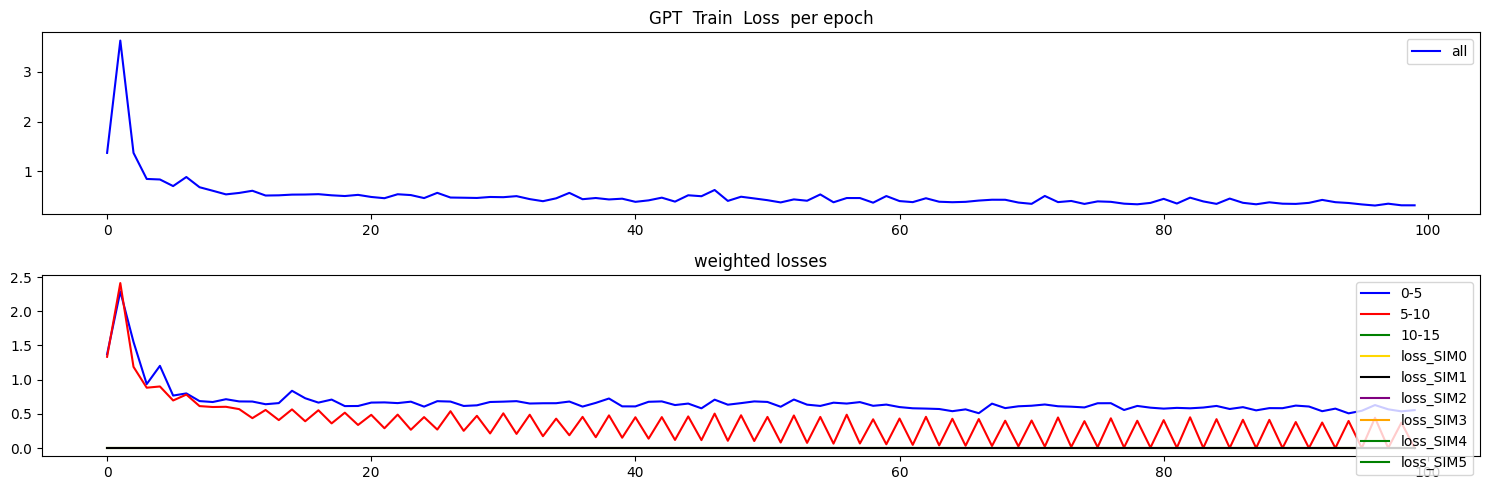

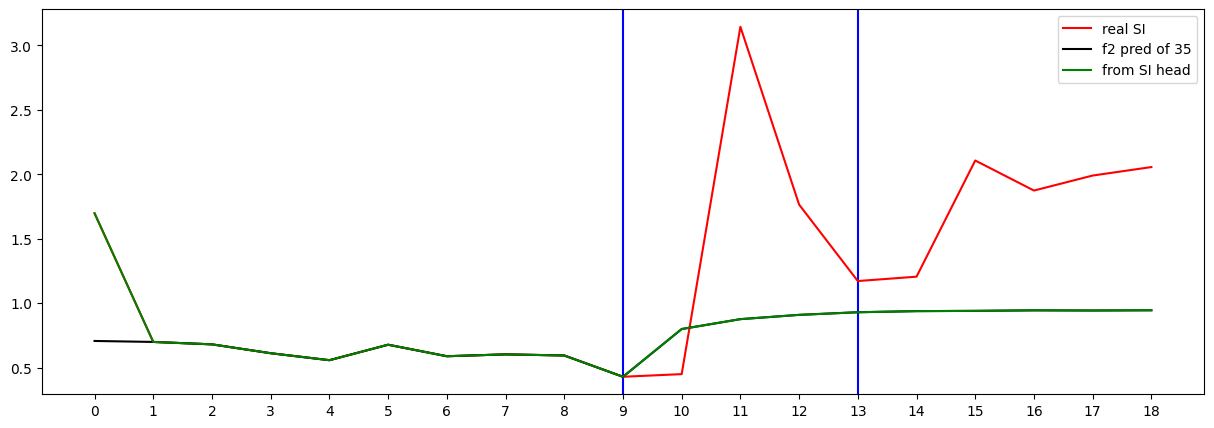

Testing R**2 - (all) - (no inputs):  0.10991919156979646
Testing R**2 - (f2) - SI full (no inputs):  -3.291705894555025
Testing R**2 - SI head only (no inputs):  -3.291705894555025
0 ...index R**2 (no inputs):  0.024377711639080757
1 ...index R**2 (no inputs):  -6.126352027531831
2 ...index R**2 (no inputs):  -3.291705894555025
3 ...index R**2 (no inputs):  -0.8001029599401968
4 ...index R**2 (no inputs):  -0.23139304325278465
5 ...index R**2 (no inputs):  -1.393655904372793
6 ...index R**2 (no inputs):  -1.4464718471918458
7 ...index R**2 (no inputs):  -4.698467762532051
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.23454415760319103
10 ...index R**2 (no inputs):  -0.06449150282379512
11 ...index R**2 (no inputs):  -55.222019897914066
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  -1.1517048349570542
15 ...index R**2 (no inputs):  -0.44515234581392527
16 ...index R**2 (no inputs):  -0.3629663588560328
17 ...ind

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 6


In [50]:


chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()



[0] Train Loss: 1.190311
Loss_SI: 1.2315329313278198 Loss_all: 1.2111889123916626
===


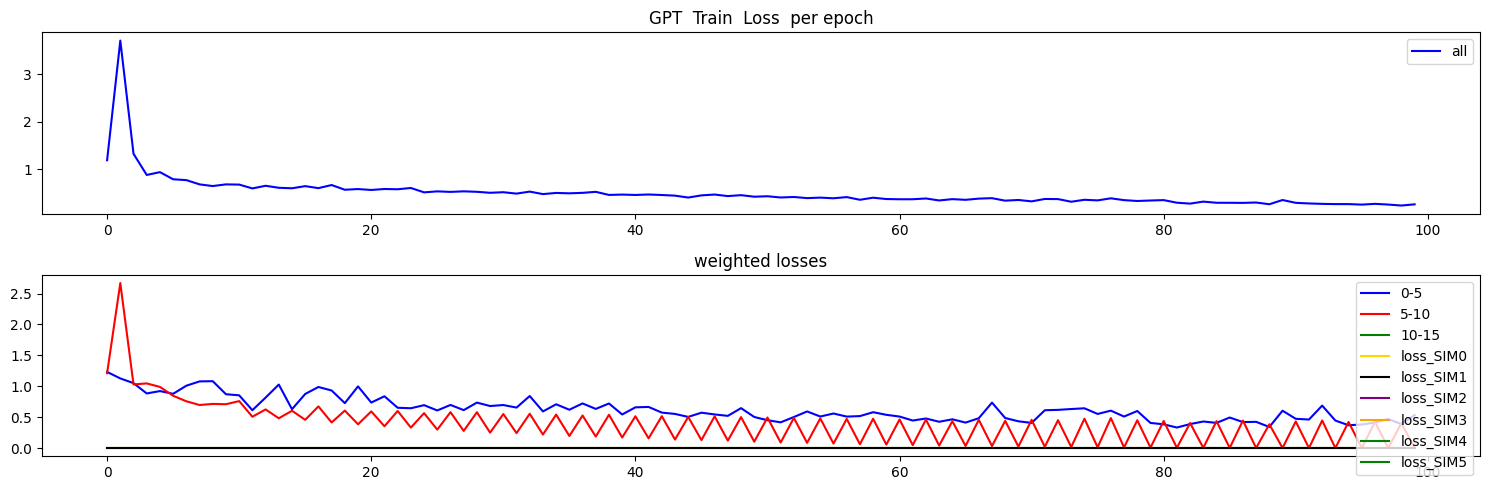

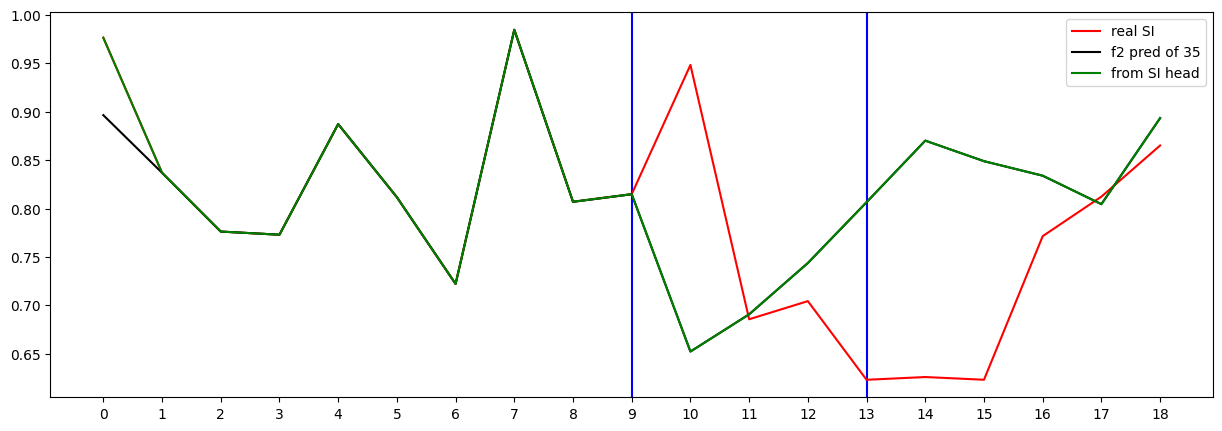

Testing R**2 - (all) - (no inputs):  0.9982406366035017
Testing R**2 - (f2) - SI full (no inputs):  -0.03458284863880423
Testing R**2 - SI head only (no inputs):  -0.03458284863880423
0 ...index R**2 (no inputs):  -0.051924652740084065
1 ...index R**2 (no inputs):  -13.032978022604192
2 ...index R**2 (no inputs):  -0.03458284863880423
3 ...index R**2 (no inputs):  -0.423499433775375
4 ...index R**2 (no inputs):  -1.2680221843129513
5 ...index R**2 (no inputs):  -58.95014457884747
6 ...index R**2 (no inputs):  0.06771190967299645
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.080829427552773
10 ...index R**2 (no inputs):  -0.40935962303756424
11 ...index R**2 (no inputs):  -12.88290470739731
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.3278407736765145
16 ...index R**2 (no inputs):  -0.30566692443481736
17 ...index R**2 (no inputs):  -3288.3

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )



[0] Train Loss: 1.358484
Loss_SI: 1.2868218421936035 Loss_all: 1.436655044555664
===


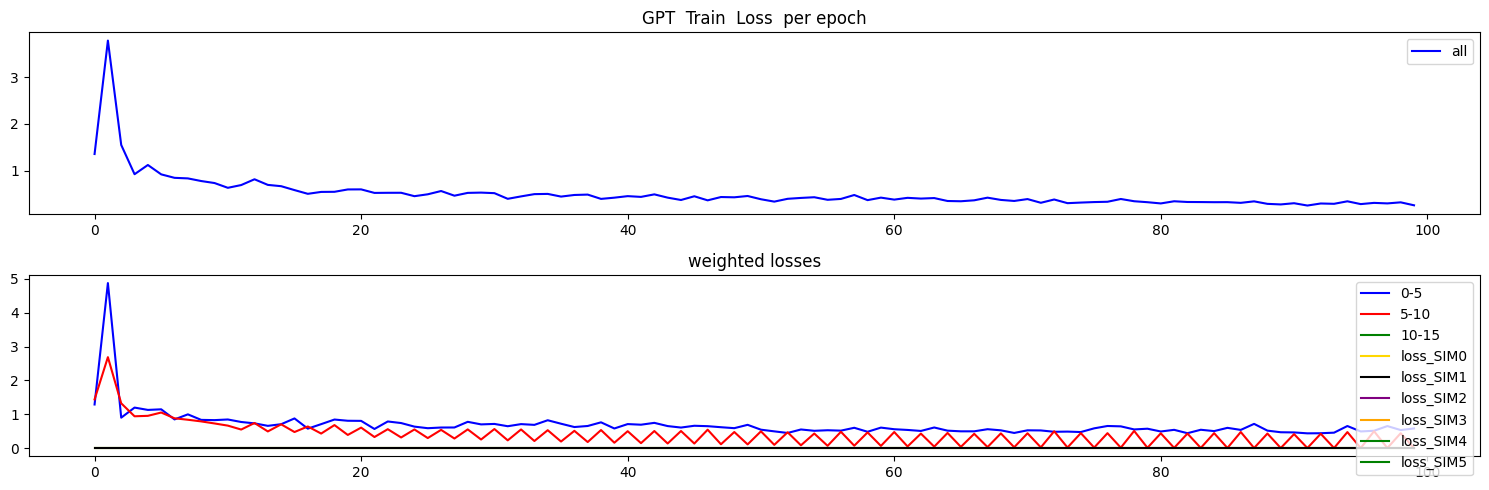

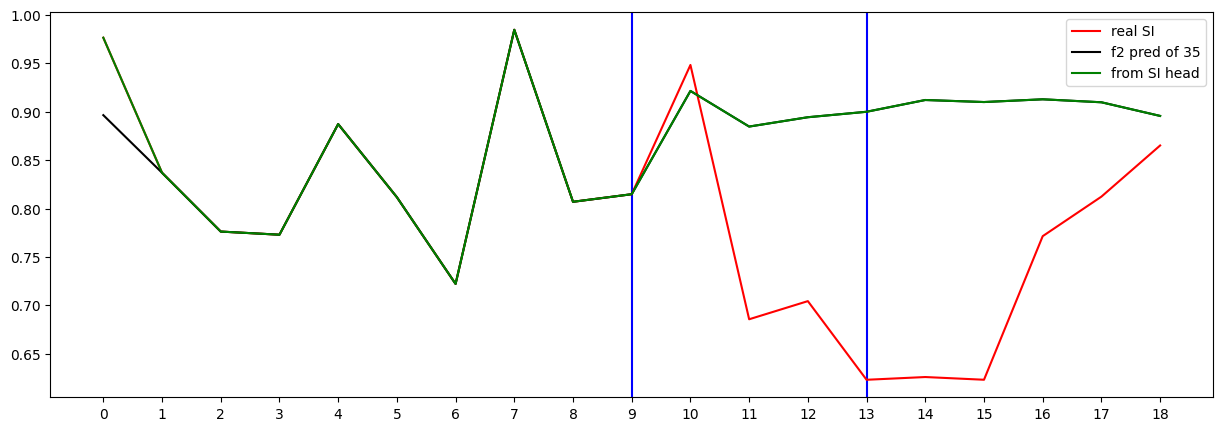

Testing R**2 - (all) - (no inputs):  0.9984679624137491
Testing R**2 - (f2) - SI full (no inputs):  -1.9288088265986376
Testing R**2 - SI head only (no inputs):  -1.9288088265986376
0 ...index R**2 (no inputs):  -0.06164436869540402
1 ...index R**2 (no inputs):  -17.67642216199525
2 ...index R**2 (no inputs):  -1.9288088265986376
3 ...index R**2 (no inputs):  -1.694732100210246
4 ...index R**2 (no inputs):  -2.101100934460223
5 ...index R**2 (no inputs):  -55.07417809595417
6 ...index R**2 (no inputs):  0.011825198138000315
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.7942778140745346
10 ...index R**2 (no inputs):  -0.15372770135249048
11 ...index R**2 (no inputs):  -0.5149200793716324
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.734185880032411
16 ...index R**2 (no inputs):  0.008906780974705986
17 ...index R**2 (no inputs):  -1454.12962

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.256199
Loss_SI: 1.3891581296920776 Loss_all: 1.314765214920044
===


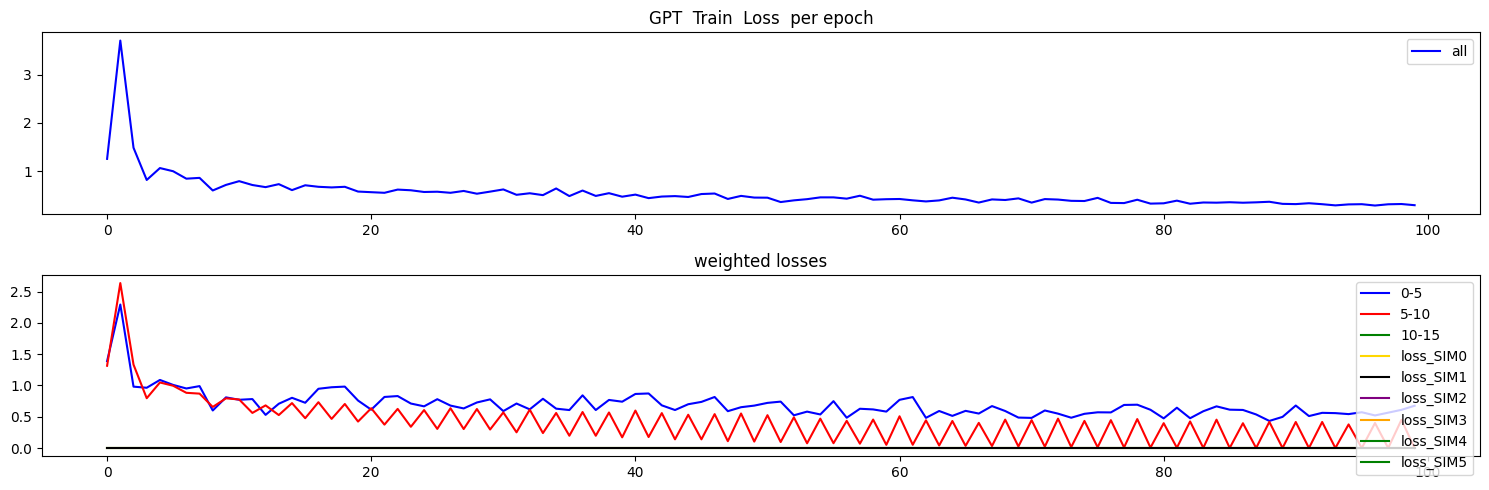

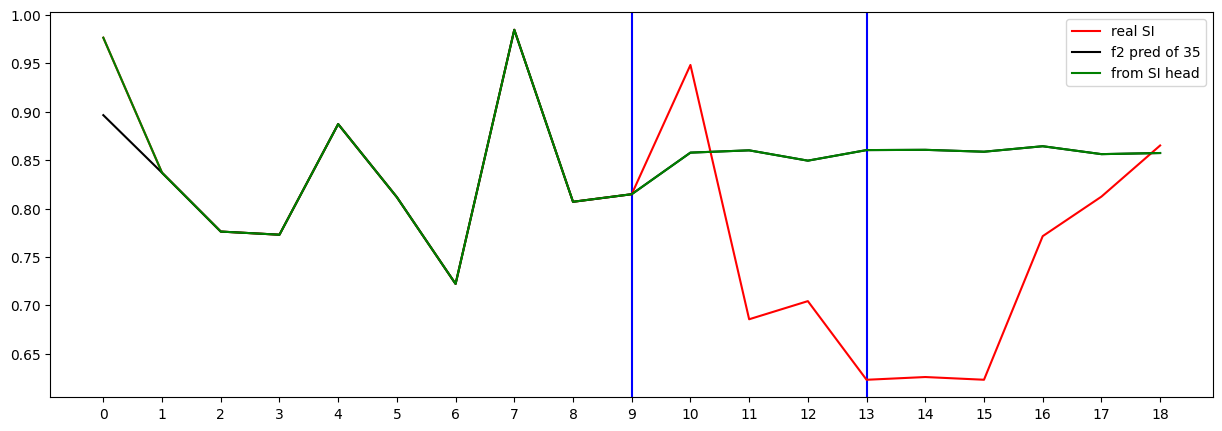

Testing R**2 - (all) - (no inputs):  0.9900316922715936
Testing R**2 - (f2) - SI full (no inputs):  -0.9716387832546816
Testing R**2 - SI head only (no inputs):  -0.9716387832546816
0 ...index R**2 (no inputs):  0.002256701017696927
1 ...index R**2 (no inputs):  -8.618763565552403
2 ...index R**2 (no inputs):  -0.9716387832546816
3 ...index R**2 (no inputs):  -5.841366513293793
4 ...index R**2 (no inputs):  -0.811512463248572
5 ...index R**2 (no inputs):  -397.7082973081579
6 ...index R**2 (no inputs):  -0.07408606556801334
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8855588157100167
10 ...index R**2 (no inputs):  -0.12586201100902183
11 ...index R**2 (no inputs):  -76.25601454460643
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5890443132242078
16 ...index R**2 (no inputs):  -0.9343819217845732
17 ...index R**2 (no inputs):  -42.82442512

In [53]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )



[0] Train Loss: 1.300853
Loss_SI: 1.333199143409729 Loss_all: 1.3309112787246704
===


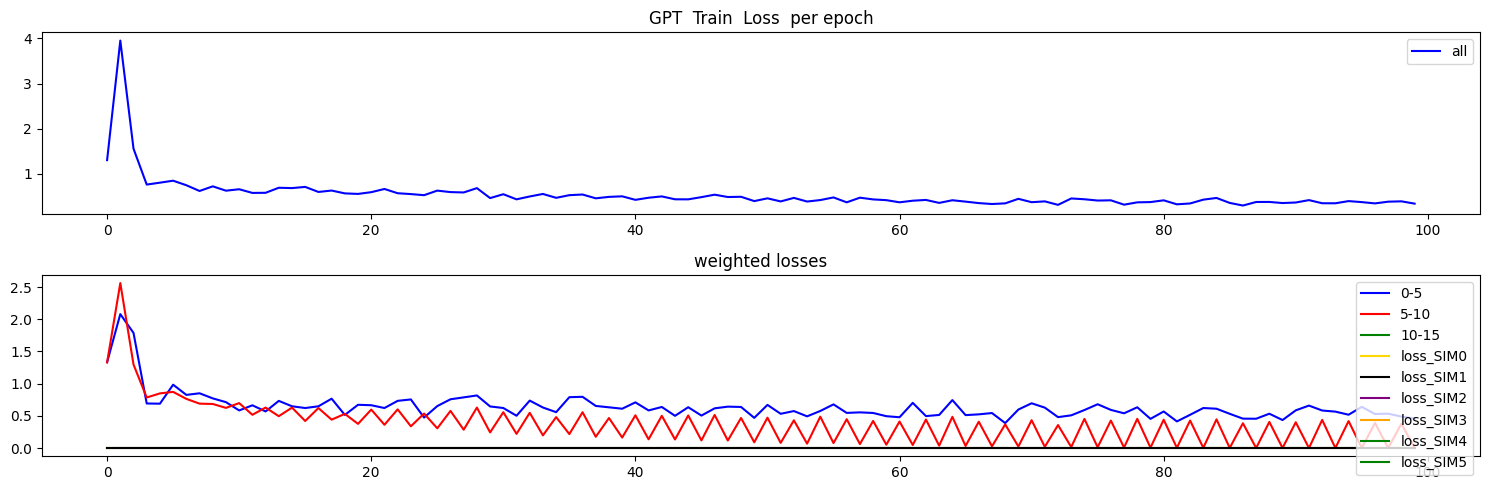

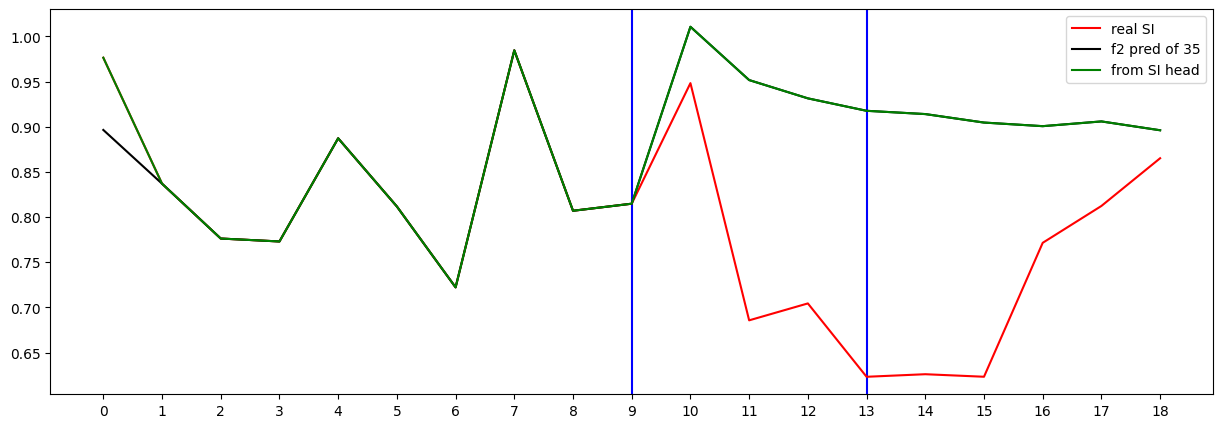

Testing R**2 - (all) - (no inputs):  0.9966100469962448
Testing R**2 - (f2) - SI full (no inputs):  -2.805848028688864
Testing R**2 - SI head only (no inputs):  -2.805848028688864
0 ...index R**2 (no inputs):  0.15687981317173094
1 ...index R**2 (no inputs):  -9.154553756890717
2 ...index R**2 (no inputs):  -2.805848028688864
3 ...index R**2 (no inputs):  -11.652155937977822
4 ...index R**2 (no inputs):  -4.734637872096374
5 ...index R**2 (no inputs):  -94.6830879385764
6 ...index R**2 (no inputs):  -0.027715366941816866
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5939644996048601
10 ...index R**2 (no inputs):  -0.01760347943513474
11 ...index R**2 (no inputs):  -2.426840488640077
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.500223121720436
16 ...index R**2 (no inputs):  -0.1368663632959639
17 ...index R**2 (no inputs):  -13325.792708333

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [55]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [56]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.5639068443493964


In [57]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.3966455179577435


In [58]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.15101319093339205


In [59]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.13846911308304377



## First Few R2


In [60]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [61]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [62]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....................R² on first n steps - R²: -0.45706530460973727
Naive_R2:....................................R²: 0.4016
RMSE:1.0758,MAE:0.4895,MASE:0.4667
1 .......................R² on just step n - R²: -0.45706530460973727
Naive_R2:....................................R²: 0.4016
RMSE:1.0758,MAE:0.4895,MASE:0.4667
2 .....................R² on first n steps - R²: -0.5263502462736562
Naive_R2:....................................R²: 0.0462
RMSE:0.8467,MAE:0.4149,MASE:0.7474
2 .......................R² on just step n - R²: -1.0342738966418241
Naive_R2:....................................R²: 0.3315
RMSE:0.5260,MAE:0.3402,MASE:0.5392
3 .....................R² on first n steps - R²: -0.5111678182503354
Naive_R2:....................................R²: -0.0800
RMSE:0.7109,MAE:0.3504,MASE:0.9176
3 .......................R² on just step n - R²: -1.1476016535633193
Naive_R2:....................................R²: 0.1455
RMSE:0.2865,MAE:0.2213,MASE:0.7617
4 .....................R² on first n 

In [63]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....................R² on first n steps - R²: -0.2077339018102089
Naive_R2:....................................R²: 0.5040
RMSE:0.9794,MAE:0.4905,MASE:0.4677
1 .......................R² on just step n - R²: -0.2077339018102089
Naive_R2:....................................R²: 0.5040
RMSE:0.9794,MAE:0.4905,MASE:0.4677
2 .....................R² on first n steps - R²: -0.2581752596085338
Naive_R2:....................................R²: 0.2138
RMSE:0.7688,MAE:0.4136,MASE:0.7452
2 .......................R² on just step n - R²: -0.6378972556682554
Naive_R2:....................................R²: 0.4618
RMSE:0.4719,MAE:0.3367,MASE:0.5336
3 .....................R² on first n steps - R²: -0.2467042430840276
Naive_R2:....................................R²: 0.1090
RMSE:0.6457,MAE:0.3513,MASE:0.9201
3 .......................R² on just step n - R²: -0.7976739250192411
Naive_R2:....................................R²: 0.2847
RMSE:0.2621,MAE:0.2267,MASE:0.7802
4 .....................R² on first n ste

In [64]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....................R² on first n steps - R²: -0.24721487566538825
Naive_R2:....................................R²: 0.4878
RMSE:0.9953,MAE:0.4892,MASE:0.4665
1 .......................R² on just step n - R²: -0.24721487566538825
Naive_R2:....................................R²: 0.4878
RMSE:0.9953,MAE:0.4892,MASE:0.4665
2 .....................R² on first n steps - R²: -0.2733306751364275
Naive_R2:....................................R²: 0.2043
RMSE:0.7734,MAE:0.3973,MASE:0.7158
2 .......................R² on just step n - R²: -0.5119969510046405
Naive_R2:....................................R²: 0.5031
RMSE:0.4534,MAE:0.3054,MASE:0.4841
3 .....................R² on first n steps - R²: -0.24193035027570597
Naive_R2:....................................R²: 0.1124
RMSE:0.6444,MAE:0.3253,MASE:0.8519
3 .......................R² on just step n - R²: -0.2998241413139966
Naive_R2:....................................R²: 0.4828
RMSE:0.2229,MAE:0.1811,MASE:0.6234
4 .....................R² on first n 

In [65]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....................R² on first n steps - R²: -0.18388248756351766
Naive_R2:....................................R²: 0.5138
RMSE:0.9697,MAE:0.5025,MASE:0.4791
1 .......................R² on just step n - R²: -0.18388248756351766
Naive_R2:....................................R²: 0.5138
RMSE:0.9697,MAE:0.5025,MASE:0.4791
2 .....................R² on first n steps - R²: -0.18355393121877261
Naive_R2:....................................R²: 0.2604
RMSE:0.7456,MAE:0.3986,MASE:0.7181
2 .......................R² on just step n - R²: -0.2616911406273299
Naive_R2:....................................R²: 0.5854
RMSE:0.4142,MAE:0.2947,MASE:0.4670
3 .....................R² on first n steps - R²: -0.13981662684270368
Naive_R2:....................................R²: 0.1854
RMSE:0.6174,MAE:0.3131,MASE:0.8199
3 .......................R² on just step n - R²: 0.17377639812217205
Naive_R2:....................................R²: 0.6713
RMSE:0.1777,MAE:0.1420,MASE:0.4887
4 .....................R² on first n


## Plot


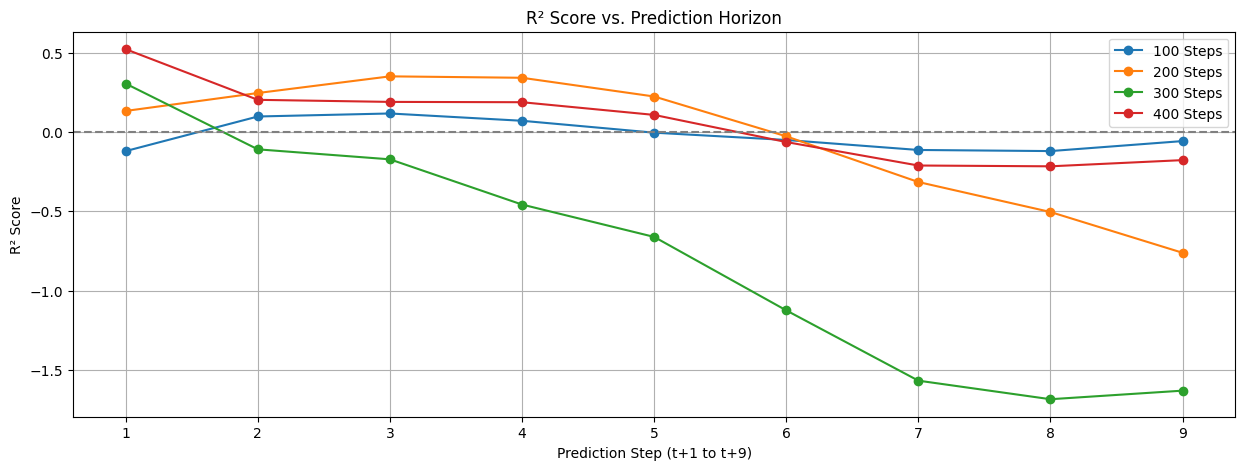

In [66]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
